# 1DCNN code for regression: F,d => t

## Importing APIs

In [2]:
import keras
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statistics import median, mean

## Importing data

In [2]:
# load dataset
dataframe = pd.read_csv("data_generated.csv", sep=',') #Gaussiano balanceado SANO - DAÑO
#dataset = dataframe.values
#print(dataframe[-1])
dataframe.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,0,158.492889,0.002326,0.004931,0.007425,0.009749,0.012508,0.014668,0
1,1,0,245.589859,0.004105,0.007689,0.011542,0.015269,0.020049,0.024148,0
2,3,0,69.531784,0.001198,0.001903,0.002842,0.003558,0.005033,0.006242,0
3,4,41,194.478088,0.003056,0.006601,0.010237,0.013604,0.016696,0.019219,1
4,5,0,90.512856,0.001362,0.002199,0.003169,0.004166,0.005958,0.007329,0


In [3]:
dataframe = dataframe.iloc[:, 1:]
dataframe.head()

,0,1,2,3,4,5,6,7,8
0,0,158.492889,0.002326,0.004931,0.007425,0.009749,0.012508,0.014668,0
1,0,245.589859,0.004105,0.007689,0.011542,0.015269,0.020049,0.024148,0
2,0,69.531784,0.001198,0.001903,0.002842,0.003558,0.005033,0.006242,0
3,41,194.478088,0.003056,0.006601,0.010237,0.013604,0.016696,0.019219,1
4,0,90.512856,0.001362,0.002199,0.003169,0.004166,0.005958,0.007329,0


In [4]:
#dataframe[1] = dataframe[1].apply(lambda x: round(x, 6))

dataframe['1'] = round(dataframe['1'], 6)
dataframe['2'] = round(dataframe['2'] , 3)
dataframe['3'] = round(dataframe['3'] , 3)
dataframe['4'] = round(dataframe['4'] , 3)
dataframe['5'] = round(dataframe['5'] , 3)
dataframe['6'] = round(dataframe['6'] , 3)
dataframe['7'] = round(dataframe['7'] , 3)
dataframe.head()

,0,1,2,3,4,5,6,7,8
0,0,158.492889,0.002,0.005,0.007,0.010,0.013,0.015,0
1,0,245.589859,0.004,0.008,0.012,0.015,0.020,0.024,0
2,0,69.531784,0.001,0.002,0.003,0.004,0.005,0.006,0
3,41,194.478088,0.003,0.007,0.010,0.014,0.017,0.019,1
4,0,90.512856,0.001,0.002,0.003,0.004,0.006,0.007,0


In [5]:
rows,columns=dataframe.shape
num_t_0 = dataframe.apply(lambda x: x[0] == 0, axis=1).sum()
print(num_t_0)
print(round(num_t_0*100/rows,2), "%")

116249
55.29 %


In [6]:
num_t_66 = dataframe.apply(lambda x: x[0] == 66, axis=1).sum()
print(num_t_66)
print(round(num_t_66*100/rows,2), "%")

1123
0.53 %


In [7]:
num_t_100 = dataframe.apply(lambda x: x[0] == 100, axis=1).sum()
print(num_t_100)
print(round(num_t_100*100/rows,2), "%")

5303
2.52 %


In [8]:
num_t_99 = dataframe.apply(lambda x: x[0] == 99, axis=1).sum()
print(num_t_99)


825


In [9]:
num_t_101 = dataframe.apply(lambda x: x[0] > 100, axis=1).sum()
print(num_t_101)
print(round(num_t_101*100/rows,2), "%")

0
0.0 %


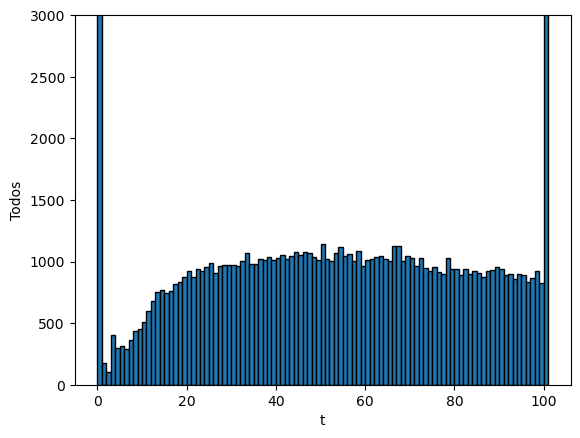

In [10]:
# Plot histogram
categories=np.arange(0,102,1)
plt.hist(dataframe['0'], bins=categories, edgecolor='black')

# Add labels and title
plt.xlabel('t')
plt.ylabel('Todos')
plt.ylim(0, 3000)  
# Show the plot
plt.show()

In [11]:
# load DATEST de Test
dataTest = pd.read_excel("datos_TEST.xlsx") 
dataTest= shuffle(dataTest)
dataTest['d1'] = dataTest['d1'] / 1000
dataTest['d2'] = dataTest['d2'] / 1000
dataTest['d3'] = dataTest['d3'] / 1000
dataTest['d4'] = dataTest['d4'] / 1000
dataTest['d5'] = dataTest['d5'] / 1000
dataTest['d6'] = dataTest['d6'] / 1000
dataTest.head()

,t,F,d1,d2,d3,d4,d5,d6,label1,label2,...,label5,label6,alfa1,alfa2,alfa3,alfa4,alfa5,alfa6,beta,label
287,0,240.891596,0.004,0.007,0.011,0.015,0.019,0.023,0,0,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
732,66,86.884461,0.002,0.004,0.005,0.006,0.008,0.009,1,0,...,0,0,0.6,1.0,1.0,1.0,1.0,1.0,1,1
93,0,194.116864,0.003,0.006,0.009,0.012,0.015,0.018,0,0,...,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
1040,66,182.502940,0.003,0.005,0.010,0.013,0.015,0.018,0,0,...,0,0,1.0,1.0,0.6,1.0,1.0,1.0,1,1
1358,100,244.151831,0.004,0.009,0.019,0.023,0.028,0.032,0,0,...,0,0,1.0,1.0,0.4,1.0,1.0,1.0,1,1


In [12]:
rows,columns=dataTest.shape
num_t_0 = dataTest.apply(lambda x: x[0] == 0, axis=1).sum()
print(num_t_0)
print(round(num_t_0*100/rows,2), "%")

636
34.64 %


In [13]:
num_t_66 = dataTest.apply(lambda x: x[0] == 66, axis=1).sum()
print(num_t_66)
print(round(num_t_66*100/rows,2), "%")

600
32.68 %


In [14]:
num_t_100 = dataTest.apply(lambda x: x[0] == 100, axis=1).sum()
print(num_t_100)
print(round(num_t_100*100/rows,2), "%")

600
32.68 %


In [15]:
dataTest_values = dataTest.values
X_test0 = dataTest_values[:,[1,2,3,4,5,6,7]] # Fuerza (N) y desp (nm)
y_test0 = dataTest_values[:,0] #t 
print(X_test0[0])
print(y_test0[0])

[2.40891596e+02 4.00000000e-03 7.00000000e-03 1.10000000e-02
 1.50000000e-02 1.90000000e-02 2.30000000e-02]
0.0


In [16]:
# Vuelvo al Dataset de Training
dataset = dataframe.values
#dataset = shuffle(dataset)

In [17]:
# split into input (X) and output (Y) variables
#df[['columna_1', 'columna_2']]
X = dataset[:,[1,2,3,4,5,6,7]] # Fuerza (N) y desp (nm)
y = dataset[:,0] #t 
print(X[0])
print(y[0])

[1.58492889e+02 2.00000000e-03 5.00000000e-03 7.00000000e-03
 1.00000000e-02 1.30000000e-02 1.50000000e-02]
0.0


In [18]:
rows,columns=X.shape
N=rows
split1=int(0.80*N)
split2=int(0.90*N)

# Split the dataset into training and testing sets
X_train, X_valid, X_test = X[:split1], X[split1:split2], X[split2:]
y_train, y_valid, y_test = y[:split1], y[split1:split2], y[split2:]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)
print(X_test0.shape, y_test0.shape)

(168205, 7) (168205,)
(21026, 7) (21026,)
(21026, 7) (21026,)
(1836, 7) (1836,)


In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_test0 = scaler.transform(X_test0)

In [20]:
X_train= X_train.reshape(-1,7,1)
X_valid= X_valid.reshape(-1,7,1)
X_test= X_test.reshape(-1,7,1)
X_test0= X_test0.reshape(-1,7,1)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)
print(X_test0.shape, y_test0.shape)

(168205, 7, 1) (168205,)
(21026, 7, 1) (21026,)
(21026, 7, 1) (21026,)
(1836, 7, 1) (1836,)


## Model architecture

In [21]:
# define model architecture : 1DCNN-classification
from keras.layers import Input
from keras.models import Model
from keras.layers import concatenate
from keras.models import Sequential
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model

Inp = Input(shape=(7,1))
#tf.keras.Input(shape=None,
#Inp = Input(shape=(X.shape[1],1))

x1 = Sequential()

x1 = Conv1D(filters=32, kernel_size=3, input_shape=(7,1))(Inp) #32
#x1 = MaxPooling1D(pool_size=2)(x1)

x1 = Conv1D(filters=32, kernel_size=3, activation='relu')(x1) #32
#x1 = MaxPooling1D(pool_size=2)(x1)

x1 = Conv1D(filters=32, kernel_size=2, activation='relu')(x1)
#x1 = MaxPooling1D(pool_size=2)(x1)

#x1 = Conv1D(filters=128, kernel_size=3, activation='relu')(x1)
#x1 = MaxPooling1D(pool_size=2)(x1)

#x1 = Conv1D(filters=256, kernel_size=3, activation='relu')(x1)
#x1 = MaxPooling1D(pool_size=2)(x1)

x1 = Flatten()(x1)

cnn1 = Model(Inp,x1)

In [22]:
from keras.layers import concatenate
#x = concatenate([cnn1.output,cnn2.output])
x = cnn1.output
#---------------------------------
x = Dense(64, activation='relu')((x)) #63
x = Dense(32, activation='relu')(x) #54
x = Dense(1, activation=None)(x) 
#---------------------------------
model = Model(inputs = Inp, outputs=x)

In [23]:
# summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 5, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 32)             3104      
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 32)             2080      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080

## Compile

In [24]:
# Compile model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

## Train

In [25]:
# Train model
epochs=6000
batch_size=128
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=epochs, batch_size=batch_size, verbose=2,shuffle = False)

Epoch 1/6000
1315/1315 - 5s - loss: 1718.9602 - mae: 25.1391 - val_loss: 1643.6355 - val_mae: 25.1328 - 5s/epoch - 4ms/step
Epoch 2/6000
1315/1315 - 3s - loss: 1451.7988 - mae: 25.7188 - val_loss: 1236.4901 - val_mae: 26.5790 - 3s/epoch - 3ms/step
Epoch 3/6000
1315/1315 - 4s - loss: 1186.3536 - mae: 27.6042 - val_loss: 1171.7406 - val_mae: 28.0142 - 4s/epoch - 3ms/step
Epoch 4/6000
1315/1315 - 4s - loss: 1160.3838 - mae: 28.1503 - val_loss: 1152.3114 - val_mae: 28.2014 - 4s/epoch - 3ms/step
Epoch 5/6000
1315/1315 - 4s - loss: 1143.1826 - mae: 28.3311 - val_loss: 1135.8456 - val_mae: 28.3602 - 4s/epoch - 3ms/step
Epoch 6/6000
1315/1315 - 4s - loss: 1129.5839 - mae: 28.4873 - val_loss: 1123.3025 - val_mae: 28.4929 - 4s/epoch - 3ms/step
Epoch 7/6000
1315/1315 - 4s - loss: 1119.8219 - mae: 28.6156 - val_loss: 1114.4724 - val_mae: 28.5989 - 4s/epoch - 3ms/step
Epoch 8/6000
1315/1315 - 4s - loss: 1113.3522 - mae: 28.7168 - val_loss: 1108.6665 - val_mae: 28.6805 - 4s/epoch - 3ms/step
Epoch 9/

Epoch 68/6000
1315/1315 - 4s - loss: 750.5818 - mae: 21.9666 - val_loss: 748.4605 - val_mae: 21.9848 - 4s/epoch - 3ms/step
Epoch 69/6000
1315/1315 - 4s - loss: 746.2261 - mae: 21.8523 - val_loss: 744.2039 - val_mae: 21.8777 - 4s/epoch - 3ms/step
Epoch 70/6000
1315/1315 - 4s - loss: 742.3149 - mae: 21.7522 - val_loss: 740.3453 - val_mae: 21.7856 - 4s/epoch - 3ms/step
Epoch 71/6000
1315/1315 - 4s - loss: 738.7078 - mae: 21.6614 - val_loss: 736.7170 - val_mae: 21.7019 - 4s/epoch - 3ms/step
Epoch 72/6000
1315/1315 - 4s - loss: 735.2548 - mae: 21.5782 - val_loss: 733.2397 - val_mae: 21.6274 - 4s/epoch - 3ms/step
Epoch 73/6000
1315/1315 - 4s - loss: 731.8970 - mae: 21.5027 - val_loss: 729.8441 - val_mae: 21.5562 - 4s/epoch - 3ms/step
Epoch 74/6000
1315/1315 - 4s - loss: 728.5707 - mae: 21.4297 - val_loss: 726.4747 - val_mae: 21.4854 - 4s/epoch - 3ms/step
Epoch 75/6000
1315/1315 - 4s - loss: 725.1998 - mae: 21.3550 - val_loss: 723.0331 - val_mae: 21.4156 - 4s/epoch - 3ms/step
Epoch 76/6000
13

Epoch 135/6000
1315/1315 - 4s - loss: 551.4268 - mae: 17.3578 - val_loss: 553.5645 - val_mae: 17.3798 - 4s/epoch - 3ms/step
Epoch 136/6000
1315/1315 - 4s - loss: 549.8167 - mae: 17.3130 - val_loss: 552.0649 - val_mae: 17.3346 - 4s/epoch - 3ms/step
Epoch 137/6000
1315/1315 - 4s - loss: 548.2160 - mae: 17.2691 - val_loss: 550.5696 - val_mae: 17.2928 - 4s/epoch - 3ms/step
Epoch 138/6000
1315/1315 - 4s - loss: 546.6342 - mae: 17.2267 - val_loss: 549.1005 - val_mae: 17.2512 - 4s/epoch - 3ms/step
Epoch 139/6000
1315/1315 - 4s - loss: 545.0834 - mae: 17.1878 - val_loss: 547.6655 - val_mae: 17.2127 - 4s/epoch - 3ms/step
Epoch 140/6000
1315/1315 - 5s - loss: 543.5502 - mae: 17.1481 - val_loss: 546.2105 - val_mae: 17.1746 - 5s/epoch - 4ms/step
Epoch 141/6000
1315/1315 - 4s - loss: 542.0522 - mae: 17.1086 - val_loss: 544.7903 - val_mae: 17.1360 - 4s/epoch - 3ms/step
Epoch 142/6000
1315/1315 - 4s - loss: 540.5989 - mae: 17.0682 - val_loss: 543.4077 - val_mae: 17.0955 - 4s/epoch - 3ms/step
Epoch 14

1315/1315 - 4s - loss: 486.7049 - mae: 15.4276 - val_loss: 491.8290 - val_mae: 15.5036 - 4s/epoch - 3ms/step
Epoch 202/6000
1315/1315 - 4s - loss: 486.2315 - mae: 15.4125 - val_loss: 491.3500 - val_mae: 15.4890 - 4s/epoch - 3ms/step
Epoch 203/6000
1315/1315 - 4s - loss: 485.7644 - mae: 15.3970 - val_loss: 490.8994 - val_mae: 15.4740 - 4s/epoch - 3ms/step
Epoch 204/6000
1315/1315 - 4s - loss: 485.3083 - mae: 15.3828 - val_loss: 490.4902 - val_mae: 15.4597 - 4s/epoch - 3ms/step
Epoch 205/6000
1315/1315 - 4s - loss: 484.8611 - mae: 15.3687 - val_loss: 490.0506 - val_mae: 15.4436 - 4s/epoch - 3ms/step
Epoch 206/6000
1315/1315 - 4s - loss: 484.4202 - mae: 15.3543 - val_loss: 489.6022 - val_mae: 15.4289 - 4s/epoch - 3ms/step
Epoch 207/6000
1315/1315 - 5s - loss: 483.9841 - mae: 15.3397 - val_loss: 489.1564 - val_mae: 15.4153 - 5s/epoch - 3ms/step
Epoch 208/6000
1315/1315 - 4s - loss: 483.5630 - mae: 15.3258 - val_loss: 488.7419 - val_mae: 15.4015 - 4s/epoch - 3ms/step
Epoch 209/6000
1315/131

Epoch 268/6000
1315/1315 - 4s - loss: 466.6474 - mae: 14.7799 - val_loss: 472.2027 - val_mae: 14.8782 - 4s/epoch - 3ms/step
Epoch 269/6000
1315/1315 - 4s - loss: 466.3897 - mae: 14.7746 - val_loss: 471.9330 - val_mae: 14.8735 - 4s/epoch - 3ms/step
Epoch 270/6000
1315/1315 - 4s - loss: 466.1253 - mae: 14.7674 - val_loss: 471.7185 - val_mae: 14.8666 - 4s/epoch - 3ms/step
Epoch 271/6000
1315/1315 - 4s - loss: 465.8989 - mae: 14.7602 - val_loss: 471.4944 - val_mae: 14.8595 - 4s/epoch - 3ms/step
Epoch 272/6000
1315/1315 - 4s - loss: 465.6862 - mae: 14.7536 - val_loss: 471.3070 - val_mae: 14.8496 - 4s/epoch - 3ms/step
Epoch 273/6000
1315/1315 - 4s - loss: 465.4790 - mae: 14.7463 - val_loss: 471.0969 - val_mae: 14.8458 - 4s/epoch - 3ms/step
Epoch 274/6000
1315/1315 - 4s - loss: 465.2756 - mae: 14.7394 - val_loss: 470.8878 - val_mae: 14.8400 - 4s/epoch - 3ms/step
Epoch 275/6000
1315/1315 - 4s - loss: 465.0775 - mae: 14.7328 - val_loss: 470.7495 - val_mae: 14.8270 - 4s/epoch - 3ms/step
Epoch 27

1315/1315 - 4s - loss: 455.5687 - mae: 14.4332 - val_loss: 460.9277 - val_mae: 14.5235 - 4s/epoch - 3ms/step
Epoch 335/6000
1315/1315 - 5s - loss: 455.4353 - mae: 14.4289 - val_loss: 460.8087 - val_mae: 14.5205 - 5s/epoch - 4ms/step
Epoch 336/6000
1315/1315 - 4s - loss: 455.3041 - mae: 14.4249 - val_loss: 460.6500 - val_mae: 14.5134 - 4s/epoch - 3ms/step
Epoch 337/6000
1315/1315 - 4s - loss: 455.1714 - mae: 14.4209 - val_loss: 460.5263 - val_mae: 14.5085 - 4s/epoch - 3ms/step
Epoch 338/6000
1315/1315 - 4s - loss: 455.0396 - mae: 14.4168 - val_loss: 460.3673 - val_mae: 14.5043 - 4s/epoch - 3ms/step
Epoch 339/6000
1315/1315 - 4s - loss: 454.9080 - mae: 14.4128 - val_loss: 460.2309 - val_mae: 14.4995 - 4s/epoch - 3ms/step
Epoch 340/6000
1315/1315 - 5s - loss: 454.7756 - mae: 14.4094 - val_loss: 460.0872 - val_mae: 14.4967 - 5s/epoch - 4ms/step
Epoch 341/6000
1315/1315 - 5s - loss: 454.6347 - mae: 14.4085 - val_loss: 459.9357 - val_mae: 14.4951 - 5s/epoch - 4ms/step
Epoch 342/6000
1315/131

Epoch 401/6000
1315/1315 - 4s - loss: 447.3269 - mae: 14.2095 - val_loss: 452.4255 - val_mae: 14.2882 - 4s/epoch - 3ms/step
Epoch 402/6000
1315/1315 - 4s - loss: 447.1980 - mae: 14.2072 - val_loss: 452.2814 - val_mae: 14.2873 - 4s/epoch - 3ms/step
Epoch 403/6000
1315/1315 - 5s - loss: 447.0660 - mae: 14.2044 - val_loss: 452.1472 - val_mae: 14.2831 - 5s/epoch - 4ms/step
Epoch 404/6000
1315/1315 - 4s - loss: 446.9429 - mae: 14.2007 - val_loss: 452.0465 - val_mae: 14.2789 - 4s/epoch - 3ms/step
Epoch 405/6000
1315/1315 - 4s - loss: 446.8318 - mae: 14.1969 - val_loss: 451.9308 - val_mae: 14.2767 - 4s/epoch - 3ms/step
Epoch 406/6000
1315/1315 - 4s - loss: 446.7243 - mae: 14.1928 - val_loss: 451.8112 - val_mae: 14.2718 - 4s/epoch - 3ms/step
Epoch 407/6000
1315/1315 - 4s - loss: 446.6147 - mae: 14.1888 - val_loss: 451.7039 - val_mae: 14.2679 - 4s/epoch - 3ms/step
Epoch 408/6000
1315/1315 - 5s - loss: 446.5088 - mae: 14.1849 - val_loss: 451.5947 - val_mae: 14.2636 - 5s/epoch - 4ms/step
Epoch 40

1315/1315 - 5s - loss: 440.6354 - mae: 14.0045 - val_loss: 445.5594 - val_mae: 14.0837 - 5s/epoch - 3ms/step
Epoch 468/6000
1315/1315 - 4s - loss: 440.5298 - mae: 14.0018 - val_loss: 445.4539 - val_mae: 14.0794 - 4s/epoch - 3ms/step
Epoch 469/6000
1315/1315 - 4s - loss: 440.4313 - mae: 13.9990 - val_loss: 445.3566 - val_mae: 14.0774 - 4s/epoch - 3ms/step
Epoch 470/6000
1315/1315 - 4s - loss: 440.3326 - mae: 13.9964 - val_loss: 445.2647 - val_mae: 14.0747 - 4s/epoch - 3ms/step
Epoch 471/6000
1315/1315 - 5s - loss: 440.2358 - mae: 13.9938 - val_loss: 445.1902 - val_mae: 14.0825 - 5s/epoch - 4ms/step
Epoch 472/6000
1315/1315 - 4s - loss: 440.1388 - mae: 13.9908 - val_loss: 445.0794 - val_mae: 14.0705 - 4s/epoch - 3ms/step
Epoch 473/6000
1315/1315 - 4s - loss: 440.0385 - mae: 13.9885 - val_loss: 445.0017 - val_mae: 14.0775 - 4s/epoch - 3ms/step
Epoch 474/6000
1315/1315 - 4s - loss: 439.9374 - mae: 13.9856 - val_loss: 444.8718 - val_mae: 14.0656 - 4s/epoch - 3ms/step
Epoch 475/6000
1315/131

Epoch 534/6000
1315/1315 - 5s - loss: 434.5076 - mae: 13.8329 - val_loss: 439.4463 - val_mae: 13.9218 - 5s/epoch - 4ms/step
Epoch 535/6000
1315/1315 - 5s - loss: 434.4218 - mae: 13.8307 - val_loss: 439.3470 - val_mae: 13.9202 - 5s/epoch - 4ms/step
Epoch 536/6000
1315/1315 - 5s - loss: 434.3377 - mae: 13.8281 - val_loss: 439.2589 - val_mae: 13.9156 - 5s/epoch - 4ms/step
Epoch 537/6000
1315/1315 - 5s - loss: 434.2510 - mae: 13.8255 - val_loss: 439.1724 - val_mae: 13.9138 - 5s/epoch - 4ms/step
Epoch 538/6000
1315/1315 - 5s - loss: 434.1722 - mae: 13.8230 - val_loss: 439.0579 - val_mae: 13.9024 - 5s/epoch - 4ms/step
Epoch 539/6000
1315/1315 - 5s - loss: 434.0812 - mae: 13.8202 - val_loss: 439.0016 - val_mae: 13.9079 - 5s/epoch - 4ms/step
Epoch 540/6000
1315/1315 - 5s - loss: 433.9981 - mae: 13.8181 - val_loss: 438.9351 - val_mae: 13.9074 - 5s/epoch - 3ms/step
Epoch 541/6000
1315/1315 - 5s - loss: 433.9175 - mae: 13.8158 - val_loss: 438.8513 - val_mae: 13.9077 - 5s/epoch - 4ms/step
Epoch 54

1315/1315 - 5s - loss: 428.4977 - mae: 13.6665 - val_loss: 433.3051 - val_mae: 13.7452 - 5s/epoch - 4ms/step
Epoch 601/6000
1315/1315 - 5s - loss: 428.4138 - mae: 13.6637 - val_loss: 433.2149 - val_mae: 13.7424 - 5s/epoch - 4ms/step
Epoch 602/6000
1315/1315 - 5s - loss: 428.3344 - mae: 13.6613 - val_loss: 433.1852 - val_mae: 13.7519 - 5s/epoch - 4ms/step
Epoch 603/6000
1315/1315 - 5s - loss: 428.2559 - mae: 13.6585 - val_loss: 433.0547 - val_mae: 13.7396 - 5s/epoch - 4ms/step
Epoch 604/6000
1315/1315 - 5s - loss: 428.1719 - mae: 13.6562 - val_loss: 432.9926 - val_mae: 13.7481 - 5s/epoch - 4ms/step
Epoch 605/6000
1315/1315 - 5s - loss: 428.0938 - mae: 13.6536 - val_loss: 432.8424 - val_mae: 13.7344 - 5s/epoch - 4ms/step
Epoch 606/6000
1315/1315 - 5s - loss: 428.0127 - mae: 13.6515 - val_loss: 432.7645 - val_mae: 13.7317 - 5s/epoch - 4ms/step
Epoch 607/6000
1315/1315 - 5s - loss: 427.9312 - mae: 13.6492 - val_loss: 432.6783 - val_mae: 13.7283 - 5s/epoch - 3ms/step
Epoch 608/6000
1315/131

Epoch 667/6000
1315/1315 - 5s - loss: 423.3562 - mae: 13.5151 - val_loss: 428.0561 - val_mae: 13.6091 - 5s/epoch - 4ms/step
Epoch 668/6000
1315/1315 - 5s - loss: 423.2846 - mae: 13.5133 - val_loss: 427.9797 - val_mae: 13.6078 - 5s/epoch - 4ms/step
Epoch 669/6000
1315/1315 - 5s - loss: 423.2145 - mae: 13.5115 - val_loss: 427.9240 - val_mae: 13.6055 - 5s/epoch - 4ms/step
Epoch 670/6000
1315/1315 - 5s - loss: 423.1450 - mae: 13.5093 - val_loss: 427.8586 - val_mae: 13.6051 - 5s/epoch - 4ms/step
Epoch 671/6000
1315/1315 - 5s - loss: 423.0731 - mae: 13.5073 - val_loss: 427.7945 - val_mae: 13.6028 - 5s/epoch - 4ms/step
Epoch 672/6000
1315/1315 - 5s - loss: 423.0079 - mae: 13.5055 - val_loss: 427.7299 - val_mae: 13.6002 - 5s/epoch - 4ms/step
Epoch 673/6000
1315/1315 - 5s - loss: 422.9362 - mae: 13.5035 - val_loss: 427.8924 - val_mae: 13.6154 - 5s/epoch - 4ms/step
Epoch 674/6000
1315/1315 - 5s - loss: 422.8803 - mae: 13.5012 - val_loss: 427.8102 - val_mae: 13.6130 - 5s/epoch - 4ms/step
Epoch 67

1315/1315 - 5s - loss: 418.8444 - mae: 13.3925 - val_loss: 423.8405 - val_mae: 13.5000 - 5s/epoch - 3ms/step
Epoch 734/6000
1315/1315 - 5s - loss: 418.7763 - mae: 13.3902 - val_loss: 423.7729 - val_mae: 13.4986 - 5s/epoch - 3ms/step
Epoch 735/6000
1315/1315 - 5s - loss: 418.7117 - mae: 13.3882 - val_loss: 423.7162 - val_mae: 13.4979 - 5s/epoch - 3ms/step
Epoch 736/6000
1315/1315 - 5s - loss: 418.6395 - mae: 13.3867 - val_loss: 423.8821 - val_mae: 13.5097 - 5s/epoch - 4ms/step
Epoch 737/6000
1315/1315 - 6s - loss: 418.5853 - mae: 13.3850 - val_loss: 423.5963 - val_mae: 13.4951 - 6s/epoch - 5ms/step
Epoch 738/6000
1315/1315 - 5s - loss: 418.5124 - mae: 13.3830 - val_loss: 423.5299 - val_mae: 13.4925 - 5s/epoch - 4ms/step
Epoch 739/6000
1315/1315 - 5s - loss: 418.4482 - mae: 13.3816 - val_loss: 423.4655 - val_mae: 13.4908 - 5s/epoch - 4ms/step
Epoch 740/6000
1315/1315 - 5s - loss: 418.3831 - mae: 13.3799 - val_loss: 423.4157 - val_mae: 13.4899 - 5s/epoch - 4ms/step
Epoch 741/6000
1315/131

Epoch 800/6000
1315/1315 - 5s - loss: 414.7787 - mae: 13.2828 - val_loss: 420.3901 - val_mae: 13.4149 - 5s/epoch - 4ms/step
Epoch 801/6000
1315/1315 - 5s - loss: 414.7244 - mae: 13.2812 - val_loss: 420.1066 - val_mae: 13.4028 - 5s/epoch - 4ms/step
Epoch 802/6000
1315/1315 - 5s - loss: 414.6569 - mae: 13.2799 - val_loss: 420.0713 - val_mae: 13.4032 - 5s/epoch - 4ms/step
Epoch 803/6000
1315/1315 - 5s - loss: 414.6061 - mae: 13.2782 - val_loss: 420.0057 - val_mae: 13.4011 - 5s/epoch - 4ms/step
Epoch 804/6000
1315/1315 - 5s - loss: 414.5429 - mae: 13.2765 - val_loss: 420.2180 - val_mae: 13.4139 - 5s/epoch - 4ms/step
Epoch 805/6000
1315/1315 - 5s - loss: 414.4895 - mae: 13.2751 - val_loss: 420.1494 - val_mae: 13.4118 - 5s/epoch - 4ms/step
Epoch 806/6000
1315/1315 - 5s - loss: 414.4350 - mae: 13.2734 - val_loss: 420.1025 - val_mae: 13.4097 - 5s/epoch - 4ms/step
Epoch 807/6000
1315/1315 - 5s - loss: 414.3797 - mae: 13.2718 - val_loss: 420.0630 - val_mae: 13.4084 - 5s/epoch - 4ms/step
Epoch 80

1315/1315 - 5s - loss: 411.3238 - mae: 13.1857 - val_loss: 417.1291 - val_mae: 13.3049 - 5s/epoch - 4ms/step
Epoch 867/6000
1315/1315 - 5s - loss: 411.2611 - mae: 13.1847 - val_loss: 417.3979 - val_mae: 13.3181 - 5s/epoch - 4ms/step
Epoch 868/6000
1315/1315 - 5s - loss: 411.2143 - mae: 13.1835 - val_loss: 417.3257 - val_mae: 13.3186 - 5s/epoch - 4ms/step
Epoch 869/6000
1315/1315 - 5s - loss: 411.1621 - mae: 13.1821 - val_loss: 417.2821 - val_mae: 13.3162 - 5s/epoch - 4ms/step
Epoch 870/6000
1315/1315 - 5s - loss: 411.1146 - mae: 13.1806 - val_loss: 417.2536 - val_mae: 13.3139 - 5s/epoch - 4ms/step
Epoch 871/6000
1315/1315 - 5s - loss: 411.0728 - mae: 13.1788 - val_loss: 416.9386 - val_mae: 13.3014 - 5s/epoch - 4ms/step
Epoch 872/6000
1315/1315 - 5s - loss: 411.0141 - mae: 13.1772 - val_loss: 417.1862 - val_mae: 13.3130 - 5s/epoch - 4ms/step
Epoch 873/6000
1315/1315 - 5s - loss: 410.9713 - mae: 13.1756 - val_loss: 417.1524 - val_mae: 13.3109 - 5s/epoch - 4ms/step
Epoch 874/6000
1315/131

Epoch 933/6000
1315/1315 - 5s - loss: 408.2500 - mae: 13.0980 - val_loss: 414.3746 - val_mae: 13.2254 - 5s/epoch - 4ms/step
Epoch 934/6000
1315/1315 - 5s - loss: 408.2022 - mae: 13.0966 - val_loss: 414.3335 - val_mae: 13.2228 - 5s/epoch - 4ms/step
Epoch 935/6000
1315/1315 - 5s - loss: 408.1624 - mae: 13.0951 - val_loss: 414.2644 - val_mae: 13.2201 - 5s/epoch - 4ms/step
Epoch 936/6000
1315/1315 - 5s - loss: 408.1166 - mae: 13.0938 - val_loss: 414.2173 - val_mae: 13.2193 - 5s/epoch - 4ms/step
Epoch 937/6000
1315/1315 - 5s - loss: 408.0707 - mae: 13.0927 - val_loss: 414.2067 - val_mae: 13.2180 - 5s/epoch - 4ms/step
Epoch 938/6000
1315/1315 - 6s - loss: 408.0294 - mae: 13.0915 - val_loss: 414.1636 - val_mae: 13.2167 - 6s/epoch - 4ms/step
Epoch 939/6000
1315/1315 - 6s - loss: 407.9894 - mae: 13.0905 - val_loss: 414.1045 - val_mae: 13.2147 - 6s/epoch - 5ms/step
Epoch 940/6000
1315/1315 - 5s - loss: 407.9453 - mae: 13.0892 - val_loss: 414.0812 - val_mae: 13.2135 - 5s/epoch - 4ms/step
Epoch 94

1315/1315 - 6s - loss: 405.4864 - mae: 13.0180 - val_loss: 411.7409 - val_mae: 13.1529 - 6s/epoch - 4ms/step
Epoch 1000/6000
1315/1315 - 5s - loss: 405.4464 - mae: 13.0165 - val_loss: 411.7074 - val_mae: 13.1514 - 5s/epoch - 4ms/step
Epoch 1001/6000
1315/1315 - 6s - loss: 405.4037 - mae: 13.0152 - val_loss: 411.6609 - val_mae: 13.1507 - 6s/epoch - 4ms/step
Epoch 1002/6000
1315/1315 - 5s - loss: 405.3647 - mae: 13.0136 - val_loss: 411.5976 - val_mae: 13.1489 - 5s/epoch - 4ms/step
Epoch 1003/6000
1315/1315 - 5s - loss: 405.3216 - mae: 13.0125 - val_loss: 411.5749 - val_mae: 13.1494 - 5s/epoch - 4ms/step
Epoch 1004/6000
1315/1315 - 5s - loss: 405.2786 - mae: 13.0113 - val_loss: 411.5329 - val_mae: 13.1473 - 5s/epoch - 4ms/step
Epoch 1005/6000
1315/1315 - 6s - loss: 405.2394 - mae: 13.0101 - val_loss: 411.4606 - val_mae: 13.1450 - 6s/epoch - 5ms/step
Epoch 1006/6000
1315/1315 - 6s - loss: 405.1941 - mae: 13.0090 - val_loss: 411.4810 - val_mae: 13.1453 - 6s/epoch - 4ms/step
Epoch 1007/6000


Epoch 1065/6000
1315/1315 - 6s - loss: 402.8129 - mae: 12.9392 - val_loss: 409.2402 - val_mae: 13.0894 - 6s/epoch - 4ms/step
Epoch 1066/6000
1315/1315 - 6s - loss: 402.7740 - mae: 12.9381 - val_loss: 409.1599 - val_mae: 13.0884 - 6s/epoch - 4ms/step
Epoch 1067/6000
1315/1315 - 6s - loss: 402.7347 - mae: 12.9368 - val_loss: 409.1413 - val_mae: 13.0876 - 6s/epoch - 4ms/step
Epoch 1068/6000
1315/1315 - 6s - loss: 402.6965 - mae: 12.9357 - val_loss: 409.1421 - val_mae: 13.0854 - 6s/epoch - 4ms/step
Epoch 1069/6000
1315/1315 - 6s - loss: 402.6584 - mae: 12.9346 - val_loss: 409.0992 - val_mae: 13.0838 - 6s/epoch - 4ms/step
Epoch 1070/6000
1315/1315 - 6s - loss: 402.6191 - mae: 12.9337 - val_loss: 409.0757 - val_mae: 13.0837 - 6s/epoch - 4ms/step
Epoch 1071/6000
1315/1315 - 6s - loss: 402.5823 - mae: 12.9326 - val_loss: 409.0500 - val_mae: 13.0838 - 6s/epoch - 4ms/step
Epoch 1072/6000
1315/1315 - 6s - loss: 402.5421 - mae: 12.9318 - val_loss: 409.0330 - val_mae: 13.0827 - 6s/epoch - 4ms/step


Epoch 1131/6000
1315/1315 - 8s - loss: 400.2193 - mae: 12.8600 - val_loss: 406.9049 - val_mae: 13.0118 - 8s/epoch - 6ms/step
Epoch 1132/6000
1315/1315 - 6s - loss: 400.1860 - mae: 12.8586 - val_loss: 406.8433 - val_mae: 13.0106 - 6s/epoch - 4ms/step
Epoch 1133/6000
1315/1315 - 6s - loss: 400.1531 - mae: 12.8580 - val_loss: 406.8330 - val_mae: 13.0103 - 6s/epoch - 5ms/step
Epoch 1134/6000
1315/1315 - 6s - loss: 400.1199 - mae: 12.8569 - val_loss: 406.8102 - val_mae: 13.0089 - 6s/epoch - 4ms/step
Epoch 1135/6000
1315/1315 - 6s - loss: 400.0877 - mae: 12.8556 - val_loss: 406.7888 - val_mae: 13.0082 - 6s/epoch - 5ms/step
Epoch 1136/6000
1315/1315 - 6s - loss: 400.0533 - mae: 12.8550 - val_loss: 406.7542 - val_mae: 13.0071 - 6s/epoch - 5ms/step
Epoch 1137/6000
1315/1315 - 6s - loss: 400.0202 - mae: 12.8538 - val_loss: 406.7177 - val_mae: 13.0059 - 6s/epoch - 4ms/step
Epoch 1138/6000
1315/1315 - 6s - loss: 399.9871 - mae: 12.8529 - val_loss: 406.6826 - val_mae: 13.0057 - 6s/epoch - 4ms/step


Epoch 1197/6000
1315/1315 - 6s - loss: 398.0593 - mae: 12.7893 - val_loss: 404.6974 - val_mae: 12.9364 - 6s/epoch - 5ms/step
Epoch 1198/6000
1315/1315 - 6s - loss: 398.0306 - mae: 12.7884 - val_loss: 404.6919 - val_mae: 12.9364 - 6s/epoch - 5ms/step
Epoch 1199/6000
1315/1315 - 6s - loss: 397.9988 - mae: 12.7872 - val_loss: 404.6426 - val_mae: 12.9352 - 6s/epoch - 5ms/step
Epoch 1200/6000
1315/1315 - 6s - loss: 397.9643 - mae: 12.7864 - val_loss: 404.6416 - val_mae: 12.9361 - 6s/epoch - 5ms/step
Epoch 1201/6000
1315/1315 - 6s - loss: 397.9348 - mae: 12.7852 - val_loss: 404.6128 - val_mae: 12.9342 - 6s/epoch - 5ms/step
Epoch 1202/6000
1315/1315 - 6s - loss: 397.9048 - mae: 12.7839 - val_loss: 404.5580 - val_mae: 12.9326 - 6s/epoch - 5ms/step
Epoch 1203/6000
1315/1315 - 6s - loss: 397.8696 - mae: 12.7825 - val_loss: 404.5254 - val_mae: 12.9312 - 6s/epoch - 4ms/step
Epoch 1204/6000
1315/1315 - 6s - loss: 397.8393 - mae: 12.7814 - val_loss: 404.5029 - val_mae: 12.9294 - 6s/epoch - 5ms/step


Epoch 1263/6000
1315/1315 - 6s - loss: 395.9794 - mae: 12.7191 - val_loss: 403.0070 - val_mae: 12.8727 - 6s/epoch - 5ms/step
Epoch 1264/6000
1315/1315 - 6s - loss: 395.9698 - mae: 12.7190 - val_loss: 402.8933 - val_mae: 12.8690 - 6s/epoch - 5ms/step
Epoch 1265/6000
1315/1315 - 7s - loss: 395.9393 - mae: 12.7181 - val_loss: 402.5074 - val_mae: 12.8546 - 7s/epoch - 5ms/step
Epoch 1266/6000
1315/1315 - 6s - loss: 395.8845 - mae: 12.7167 - val_loss: 402.5429 - val_mae: 12.8561 - 6s/epoch - 5ms/step
Epoch 1267/6000
1315/1315 - 7s - loss: 395.8583 - mae: 12.7160 - val_loss: 402.5032 - val_mae: 12.8540 - 7s/epoch - 5ms/step
Epoch 1268/6000
1315/1315 - 7s - loss: 395.8236 - mae: 12.7150 - val_loss: 402.4485 - val_mae: 12.8522 - 7s/epoch - 6ms/step
Epoch 1269/6000
1315/1315 - 6s - loss: 395.7926 - mae: 12.7139 - val_loss: 402.4418 - val_mae: 12.8510 - 6s/epoch - 5ms/step
Epoch 1270/6000
1315/1315 - 7s - loss: 395.7617 - mae: 12.7129 - val_loss: 402.3840 - val_mae: 12.8506 - 7s/epoch - 5ms/step


Epoch 1329/6000
1315/1315 - 7s - loss: 393.8852 - mae: 12.6539 - val_loss: 400.9092 - val_mae: 12.8072 - 7s/epoch - 5ms/step
Epoch 1330/6000
1315/1315 - 7s - loss: 393.8526 - mae: 12.6526 - val_loss: 400.8612 - val_mae: 12.8054 - 7s/epoch - 5ms/step
Epoch 1331/6000
1315/1315 - 8s - loss: 393.8293 - mae: 12.6517 - val_loss: 400.4911 - val_mae: 12.7948 - 8s/epoch - 6ms/step
Epoch 1332/6000
1315/1315 - 7s - loss: 393.7761 - mae: 12.6506 - val_loss: 400.8578 - val_mae: 12.8063 - 7s/epoch - 5ms/step
Epoch 1333/6000
1315/1315 - 7s - loss: 393.7634 - mae: 12.6495 - val_loss: 400.7778 - val_mae: 12.8019 - 7s/epoch - 5ms/step
Epoch 1334/6000
1315/1315 - 7s - loss: 393.7422 - mae: 12.6488 - val_loss: 400.4236 - val_mae: 12.7945 - 7s/epoch - 5ms/step
Epoch 1335/6000
1315/1315 - 7s - loss: 393.6946 - mae: 12.6484 - val_loss: 400.3642 - val_mae: 12.7927 - 7s/epoch - 5ms/step
Epoch 1336/6000
1315/1315 - 8s - loss: 393.6631 - mae: 12.6474 - val_loss: 400.3504 - val_mae: 12.7914 - 8s/epoch - 6ms/step


Epoch 1395/6000
1315/1315 - 7s - loss: 392.0489 - mae: 12.5976 - val_loss: 398.6814 - val_mae: 12.7390 - 7s/epoch - 5ms/step
Epoch 1396/6000
1315/1315 - 7s - loss: 392.0217 - mae: 12.5968 - val_loss: 398.6348 - val_mae: 12.7393 - 7s/epoch - 5ms/step
Epoch 1397/6000
1315/1315 - 7s - loss: 391.9941 - mae: 12.5962 - val_loss: 398.6252 - val_mae: 12.7380 - 7s/epoch - 5ms/step
Epoch 1398/6000
1315/1315 - 7s - loss: 391.9704 - mae: 12.5953 - val_loss: 398.5819 - val_mae: 12.7367 - 7s/epoch - 5ms/step
Epoch 1399/6000
1315/1315 - 7s - loss: 391.9505 - mae: 12.5946 - val_loss: 398.5925 - val_mae: 12.7377 - 7s/epoch - 5ms/step
Epoch 1400/6000
1315/1315 - 7s - loss: 391.9184 - mae: 12.5937 - val_loss: 398.5949 - val_mae: 12.7365 - 7s/epoch - 6ms/step
Epoch 1401/6000
1315/1315 - 7s - loss: 391.8956 - mae: 12.5929 - val_loss: 398.5445 - val_mae: 12.7350 - 7s/epoch - 5ms/step
Epoch 1402/6000
1315/1315 - 8s - loss: 391.8659 - mae: 12.5921 - val_loss: 398.9553 - val_mae: 12.7456 - 8s/epoch - 6ms/step


Epoch 1461/6000
1315/1315 - 8s - loss: 390.4840 - mae: 12.5467 - val_loss: 397.4039 - val_mae: 12.6986 - 8s/epoch - 6ms/step
Epoch 1462/6000
1315/1315 - 8s - loss: 390.4669 - mae: 12.5459 - val_loss: 397.0563 - val_mae: 12.6867 - 8s/epoch - 6ms/step
Epoch 1463/6000
1315/1315 - 8s - loss: 390.4329 - mae: 12.5453 - val_loss: 397.0461 - val_mae: 12.6860 - 8s/epoch - 6ms/step
Epoch 1464/6000
1315/1315 - 7s - loss: 390.4081 - mae: 12.5445 - val_loss: 397.0136 - val_mae: 12.6861 - 7s/epoch - 6ms/step
Epoch 1465/6000
1315/1315 - 8s - loss: 390.3830 - mae: 12.5434 - val_loss: 397.3783 - val_mae: 12.6959 - 8s/epoch - 6ms/step
Epoch 1466/6000
1315/1315 - 9s - loss: 390.3785 - mae: 12.5427 - val_loss: 397.3334 - val_mae: 12.6946 - 9s/epoch - 7ms/step
Epoch 1467/6000
1315/1315 - 8s - loss: 390.3478 - mae: 12.5420 - val_loss: 397.2886 - val_mae: 12.6941 - 8s/epoch - 6ms/step
Epoch 1468/6000
1315/1315 - 8s - loss: 390.3315 - mae: 12.5414 - val_loss: 397.2509 - val_mae: 12.6920 - 8s/epoch - 6ms/step


1315/1315 - 9s - loss: 389.1358 - mae: 12.5020 - val_loss: 396.0345 - val_mae: 12.6449 - 9s/epoch - 7ms/step
Epoch 1527/6000
1315/1315 - 10s - loss: 389.1075 - mae: 12.5008 - val_loss: 395.9939 - val_mae: 12.6465 - 10s/epoch - 8ms/step
Epoch 1528/6000
1315/1315 - 10s - loss: 389.0878 - mae: 12.5002 - val_loss: 395.9821 - val_mae: 12.6457 - 10s/epoch - 8ms/step
Epoch 1529/6000
1315/1315 - 10s - loss: 389.0718 - mae: 12.4999 - val_loss: 396.0101 - val_mae: 12.6448 - 10s/epoch - 7ms/step
Epoch 1530/6000
1315/1315 - 9s - loss: 389.0457 - mae: 12.4992 - val_loss: 395.9189 - val_mae: 12.6443 - 9s/epoch - 7ms/step
Epoch 1531/6000
1315/1315 - 10s - loss: 389.0285 - mae: 12.4983 - val_loss: 395.9040 - val_mae: 12.6434 - 10s/epoch - 8ms/step
Epoch 1532/6000
1315/1315 - 9s - loss: 389.0063 - mae: 12.4976 - val_loss: 395.8875 - val_mae: 12.6424 - 9s/epoch - 7ms/step
Epoch 1533/6000
1315/1315 - 9s - loss: 388.9959 - mae: 12.4978 - val_loss: 395.9142 - val_mae: 12.6414 - 9s/epoch - 7ms/step
Epoch 15

Epoch 1592/6000
1315/1315 - 10s - loss: 387.8869 - mae: 12.4617 - val_loss: 394.8100 - val_mae: 12.6002 - 10s/epoch - 8ms/step
Epoch 1593/6000
1315/1315 - 10s - loss: 387.8677 - mae: 12.4607 - val_loss: 394.8131 - val_mae: 12.5991 - 10s/epoch - 7ms/step
Epoch 1594/6000
1315/1315 - 16s - loss: 387.8488 - mae: 12.4604 - val_loss: 394.7707 - val_mae: 12.5987 - 16s/epoch - 12ms/step
Epoch 1595/6000
1315/1315 - 11s - loss: 387.8317 - mae: 12.4598 - val_loss: 394.7858 - val_mae: 12.5985 - 11s/epoch - 8ms/step
Epoch 1596/6000
1315/1315 - 10s - loss: 387.8130 - mae: 12.4592 - val_loss: 394.7277 - val_mae: 12.5960 - 10s/epoch - 7ms/step
Epoch 1597/6000
1315/1315 - 10s - loss: 387.7949 - mae: 12.4586 - val_loss: 394.7151 - val_mae: 12.5961 - 10s/epoch - 8ms/step
Epoch 1598/6000
1315/1315 - 12s - loss: 387.7781 - mae: 12.4579 - val_loss: 394.6900 - val_mae: 12.5954 - 12s/epoch - 9ms/step
Epoch 1599/6000
1315/1315 - 14s - loss: 387.7574 - mae: 12.4576 - val_loss: 394.6709 - val_mae: 12.5950 - 14s/

Epoch 1657/6000
1315/1315 - 9s - loss: 386.7667 - mae: 12.4261 - val_loss: 393.8073 - val_mae: 12.5626 - 9s/epoch - 7ms/step
Epoch 1658/6000
1315/1315 - 10s - loss: 386.7449 - mae: 12.4253 - val_loss: 393.8083 - val_mae: 12.5621 - 10s/epoch - 7ms/step
Epoch 1659/6000
1315/1315 - 10s - loss: 386.7297 - mae: 12.4250 - val_loss: 393.7876 - val_mae: 12.5618 - 10s/epoch - 8ms/step
Epoch 1660/6000
1315/1315 - 10s - loss: 386.7122 - mae: 12.4244 - val_loss: 393.7779 - val_mae: 12.5610 - 10s/epoch - 8ms/step
Epoch 1661/6000
1315/1315 - 10s - loss: 386.6929 - mae: 12.4242 - val_loss: 393.7693 - val_mae: 12.5608 - 10s/epoch - 7ms/step
Epoch 1662/6000
1315/1315 - 10s - loss: 386.6769 - mae: 12.4237 - val_loss: 393.7452 - val_mae: 12.5608 - 10s/epoch - 8ms/step
Epoch 1663/6000
1315/1315 - 10s - loss: 386.6604 - mae: 12.4232 - val_loss: 393.7509 - val_mae: 12.5607 - 10s/epoch - 8ms/step
Epoch 1664/6000
1315/1315 - 10s - loss: 386.6428 - mae: 12.4226 - val_loss: 393.7246 - val_mae: 12.5601 - 10s/epo

Epoch 1722/6000
1315/1315 - 10s - loss: 385.6839 - mae: 12.3945 - val_loss: 392.7311 - val_mae: 12.5270 - 10s/epoch - 8ms/step
Epoch 1723/6000
1315/1315 - 10s - loss: 385.6652 - mae: 12.3942 - val_loss: 392.7559 - val_mae: 12.5277 - 10s/epoch - 8ms/step
Epoch 1724/6000
1315/1315 - 11s - loss: 385.6580 - mae: 12.3936 - val_loss: 392.5119 - val_mae: 12.5229 - 11s/epoch - 8ms/step
Epoch 1725/6000
1315/1315 - 10s - loss: 385.6283 - mae: 12.3933 - val_loss: 392.4819 - val_mae: 12.5227 - 10s/epoch - 7ms/step
Epoch 1726/6000
1315/1315 - 10s - loss: 385.6043 - mae: 12.3928 - val_loss: 392.4821 - val_mae: 12.5227 - 10s/epoch - 7ms/step
Epoch 1727/6000
1315/1315 - 10s - loss: 385.5898 - mae: 12.3922 - val_loss: 392.4479 - val_mae: 12.5208 - 10s/epoch - 7ms/step
Epoch 1728/6000
1315/1315 - 11s - loss: 385.5763 - mae: 12.3918 - val_loss: 392.4360 - val_mae: 12.5184 - 11s/epoch - 8ms/step
Epoch 1729/6000
1315/1315 - 9s - loss: 385.5570 - mae: 12.3911 - val_loss: 392.4084 - val_mae: 12.5184 - 9s/epo

Epoch 1787/6000
1315/1315 - 11s - loss: 384.6656 - mae: 12.3624 - val_loss: 391.6054 - val_mae: 12.4890 - 11s/epoch - 9ms/step
Epoch 1788/6000
1315/1315 - 12s - loss: 384.6473 - mae: 12.3615 - val_loss: 391.5982 - val_mae: 12.4873 - 12s/epoch - 9ms/step
Epoch 1789/6000
1315/1315 - 10s - loss: 384.6337 - mae: 12.3613 - val_loss: 391.6130 - val_mae: 12.4875 - 10s/epoch - 8ms/step
Epoch 1790/6000
1315/1315 - 12s - loss: 384.6203 - mae: 12.3608 - val_loss: 391.5710 - val_mae: 12.4859 - 12s/epoch - 9ms/step
Epoch 1791/6000
1315/1315 - 11s - loss: 384.6032 - mae: 12.3603 - val_loss: 391.5966 - val_mae: 12.4872 - 11s/epoch - 9ms/step
Epoch 1792/6000
1315/1315 - 12s - loss: 384.5890 - mae: 12.3600 - val_loss: 391.5967 - val_mae: 12.4878 - 12s/epoch - 9ms/step
Epoch 1793/6000
1315/1315 - 10s - loss: 384.5735 - mae: 12.3594 - val_loss: 391.5617 - val_mae: 12.4859 - 10s/epoch - 8ms/step
Epoch 1794/6000
1315/1315 - 11s - loss: 384.5568 - mae: 12.3588 - val_loss: 391.5455 - val_mae: 12.4859 - 11s/e

Epoch 1852/6000
1315/1315 - 11s - loss: 383.6972 - mae: 12.3310 - val_loss: 390.6628 - val_mae: 12.4598 - 11s/epoch - 8ms/step
Epoch 1853/6000
1315/1315 - 11s - loss: 383.6852 - mae: 12.3309 - val_loss: 390.6298 - val_mae: 12.4577 - 11s/epoch - 8ms/step
Epoch 1854/6000
1315/1315 - 11s - loss: 383.6675 - mae: 12.3302 - val_loss: 390.6429 - val_mae: 12.4590 - 11s/epoch - 8ms/step
Epoch 1855/6000
1315/1315 - 12s - loss: 383.6607 - mae: 12.3301 - val_loss: 390.5642 - val_mae: 12.4567 - 12s/epoch - 9ms/step
Epoch 1856/6000
1315/1315 - 11s - loss: 383.6311 - mae: 12.3292 - val_loss: 390.6106 - val_mae: 12.4571 - 11s/epoch - 8ms/step
Epoch 1857/6000
1315/1315 - 11s - loss: 383.6214 - mae: 12.3287 - val_loss: 390.5685 - val_mae: 12.4572 - 11s/epoch - 9ms/step
Epoch 1858/6000
1315/1315 - 12s - loss: 383.6113 - mae: 12.3284 - val_loss: 390.5466 - val_mae: 12.4574 - 12s/epoch - 9ms/step
Epoch 1859/6000
1315/1315 - 11s - loss: 383.5917 - mae: 12.3281 - val_loss: 390.5601 - val_mae: 12.4584 - 11s/e

Epoch 1917/6000
1315/1315 - 10s - loss: 382.7778 - mae: 12.3019 - val_loss: 389.7211 - val_mae: 12.4275 - 10s/epoch - 8ms/step
Epoch 1918/6000
1315/1315 - 11s - loss: 382.7663 - mae: 12.3014 - val_loss: 389.7256 - val_mae: 12.4272 - 11s/epoch - 8ms/step
Epoch 1919/6000
1315/1315 - 11s - loss: 382.7522 - mae: 12.3008 - val_loss: 389.6922 - val_mae: 12.4262 - 11s/epoch - 8ms/step
Epoch 1920/6000
1315/1315 - 10s - loss: 382.7384 - mae: 12.3007 - val_loss: 389.6852 - val_mae: 12.4266 - 10s/epoch - 8ms/step
Epoch 1921/6000
1315/1315 - 10s - loss: 382.7249 - mae: 12.3000 - val_loss: 389.6582 - val_mae: 12.4259 - 10s/epoch - 8ms/step
Epoch 1922/6000
1315/1315 - 12s - loss: 382.7091 - mae: 12.2996 - val_loss: 389.6420 - val_mae: 12.4242 - 12s/epoch - 9ms/step
Epoch 1923/6000
1315/1315 - 10s - loss: 382.6983 - mae: 12.2992 - val_loss: 389.6262 - val_mae: 12.4238 - 10s/epoch - 8ms/step
Epoch 1924/6000
1315/1315 - 11s - loss: 382.6822 - mae: 12.2985 - val_loss: 389.6113 - val_mae: 12.4241 - 11s/e

Epoch 1982/6000
1315/1315 - 15s - loss: 381.9091 - mae: 12.2752 - val_loss: 388.8457 - val_mae: 12.3997 - 15s/epoch - 12ms/step
Epoch 1983/6000
1315/1315 - 11s - loss: 381.8973 - mae: 12.2748 - val_loss: 388.8389 - val_mae: 12.3990 - 11s/epoch - 8ms/step
Epoch 1984/6000
1315/1315 - 11s - loss: 381.8845 - mae: 12.2744 - val_loss: 388.8204 - val_mae: 12.3992 - 11s/epoch - 9ms/step
Epoch 1985/6000
1315/1315 - 12s - loss: 381.8720 - mae: 12.2741 - val_loss: 388.8278 - val_mae: 12.3987 - 12s/epoch - 9ms/step
Epoch 1986/6000
1315/1315 - 11s - loss: 381.8615 - mae: 12.2739 - val_loss: 388.8193 - val_mae: 12.3978 - 11s/epoch - 8ms/step
Epoch 1987/6000
1315/1315 - 11s - loss: 381.8458 - mae: 12.2735 - val_loss: 388.8127 - val_mae: 12.3973 - 11s/epoch - 9ms/step
Epoch 1988/6000
1315/1315 - 12s - loss: 381.8342 - mae: 12.2730 - val_loss: 388.7874 - val_mae: 12.3964 - 12s/epoch - 9ms/step
Epoch 1989/6000
1315/1315 - 11s - loss: 381.8166 - mae: 12.2728 - val_loss: 388.7897 - val_mae: 12.3960 - 11s/

Epoch 2047/6000
1315/1315 - 11s - loss: 381.0815 - mae: 12.2507 - val_loss: 388.0533 - val_mae: 12.3775 - 11s/epoch - 9ms/step
Epoch 2048/6000
1315/1315 - 10s - loss: 381.0672 - mae: 12.2500 - val_loss: 388.0500 - val_mae: 12.3778 - 10s/epoch - 8ms/step
Epoch 2049/6000
1315/1315 - 11s - loss: 381.0507 - mae: 12.2495 - val_loss: 388.0199 - val_mae: 12.3772 - 11s/epoch - 9ms/step
Epoch 2050/6000
1315/1315 - 10s - loss: 381.0377 - mae: 12.2492 - val_loss: 388.0277 - val_mae: 12.3785 - 10s/epoch - 8ms/step
Epoch 2051/6000
1315/1315 - 11s - loss: 381.0266 - mae: 12.2489 - val_loss: 388.0320 - val_mae: 12.3778 - 11s/epoch - 8ms/step
Epoch 2052/6000
1315/1315 - 11s - loss: 381.0154 - mae: 12.2485 - val_loss: 388.0080 - val_mae: 12.3779 - 11s/epoch - 9ms/step
Epoch 2053/6000
1315/1315 - 12s - loss: 381.0015 - mae: 12.2479 - val_loss: 387.9948 - val_mae: 12.3760 - 12s/epoch - 9ms/step
Epoch 2054/6000
1315/1315 - 11s - loss: 380.9899 - mae: 12.2473 - val_loss: 387.9919 - val_mae: 12.3767 - 11s/e

Epoch 2112/6000
1315/1315 - 11s - loss: 380.2576 - mae: 12.2256 - val_loss: 387.3387 - val_mae: 12.3550 - 11s/epoch - 9ms/step
Epoch 2113/6000
1315/1315 - 11s - loss: 380.2474 - mae: 12.2253 - val_loss: 387.3237 - val_mae: 12.3560 - 11s/epoch - 8ms/step
Epoch 2114/6000
1315/1315 - 11s - loss: 380.2331 - mae: 12.2248 - val_loss: 387.3178 - val_mae: 12.3542 - 11s/epoch - 8ms/step
Epoch 2115/6000
1315/1315 - 11s - loss: 380.2225 - mae: 12.2244 - val_loss: 387.2966 - val_mae: 12.3550 - 11s/epoch - 9ms/step
Epoch 2116/6000
1315/1315 - 11s - loss: 380.2084 - mae: 12.2239 - val_loss: 387.2671 - val_mae: 12.3546 - 11s/epoch - 9ms/step
Epoch 2117/6000
1315/1315 - 11s - loss: 380.1913 - mae: 12.2236 - val_loss: 387.2476 - val_mae: 12.3542 - 11s/epoch - 8ms/step
Epoch 2118/6000
1315/1315 - 12s - loss: 380.1877 - mae: 12.2233 - val_loss: 387.2074 - val_mae: 12.3535 - 12s/epoch - 9ms/step
Epoch 2119/6000
1315/1315 - 13s - loss: 380.1635 - mae: 12.2226 - val_loss: 387.2400 - val_mae: 12.3542 - 13s/e

Epoch 2177/6000
1315/1315 - 11s - loss: 379.4371 - mae: 12.2033 - val_loss: 386.4880 - val_mae: 12.3397 - 11s/epoch - 8ms/step
Epoch 2178/6000
1315/1315 - 11s - loss: 379.4271 - mae: 12.2026 - val_loss: 386.4662 - val_mae: 12.3380 - 11s/epoch - 8ms/step
Epoch 2179/6000
1315/1315 - 12s - loss: 379.4155 - mae: 12.2024 - val_loss: 386.4431 - val_mae: 12.3380 - 12s/epoch - 9ms/step
Epoch 2180/6000
1315/1315 - 12s - loss: 379.3980 - mae: 12.2022 - val_loss: 386.4352 - val_mae: 12.3378 - 12s/epoch - 9ms/step
Epoch 2181/6000
1315/1315 - 11s - loss: 379.3906 - mae: 12.2017 - val_loss: 386.4501 - val_mae: 12.3389 - 11s/epoch - 8ms/step
Epoch 2182/6000
1315/1315 - 11s - loss: 379.3812 - mae: 12.2016 - val_loss: 386.4221 - val_mae: 12.3383 - 11s/epoch - 9ms/step
Epoch 2183/6000
1315/1315 - 12s - loss: 379.3676 - mae: 12.2013 - val_loss: 386.4326 - val_mae: 12.3379 - 12s/epoch - 9ms/step
Epoch 2184/6000
1315/1315 - 11s - loss: 379.3554 - mae: 12.2011 - val_loss: 386.4120 - val_mae: 12.3382 - 11s/e

Epoch 2242/6000
1315/1315 - 11s - loss: 378.6732 - mae: 12.1810 - val_loss: 385.7778 - val_mae: 12.3198 - 11s/epoch - 8ms/step
Epoch 2243/6000
1315/1315 - 17s - loss: 378.6587 - mae: 12.1808 - val_loss: 385.7934 - val_mae: 12.3207 - 17s/epoch - 13ms/step
Epoch 2244/6000
1315/1315 - 11s - loss: 378.6501 - mae: 12.1803 - val_loss: 385.7717 - val_mae: 12.3205 - 11s/epoch - 8ms/step
Epoch 2245/6000
1315/1315 - 10s - loss: 378.6408 - mae: 12.1800 - val_loss: 385.7691 - val_mae: 12.3197 - 10s/epoch - 8ms/step
Epoch 2246/6000
1315/1315 - 11s - loss: 378.6251 - mae: 12.1800 - val_loss: 385.7772 - val_mae: 12.3199 - 11s/epoch - 8ms/step
Epoch 2247/6000
1315/1315 - 10s - loss: 378.6149 - mae: 12.1799 - val_loss: 385.7492 - val_mae: 12.3188 - 10s/epoch - 8ms/step
Epoch 2248/6000
1315/1315 - 10s - loss: 378.6071 - mae: 12.1795 - val_loss: 385.7666 - val_mae: 12.3197 - 10s/epoch - 8ms/step
Epoch 2249/6000
1315/1315 - 10s - loss: 378.5924 - mae: 12.1792 - val_loss: 385.7520 - val_mae: 12.3207 - 10s/

Epoch 2307/6000
1315/1315 - 11s - loss: 377.9245 - mae: 12.1615 - val_loss: 385.1571 - val_mae: 12.3066 - 11s/epoch - 8ms/step
Epoch 2308/6000
1315/1315 - 10s - loss: 377.9089 - mae: 12.1609 - val_loss: 385.1305 - val_mae: 12.3058 - 10s/epoch - 8ms/step
Epoch 2309/6000
1315/1315 - 10s - loss: 377.9061 - mae: 12.1607 - val_loss: 385.1265 - val_mae: 12.3065 - 10s/epoch - 8ms/step
Epoch 2310/6000
1315/1315 - 11s - loss: 377.8868 - mae: 12.1604 - val_loss: 385.1059 - val_mae: 12.3058 - 11s/epoch - 8ms/step
Epoch 2311/6000
1315/1315 - 10s - loss: 377.8811 - mae: 12.1602 - val_loss: 385.0944 - val_mae: 12.3040 - 10s/epoch - 8ms/step
Epoch 2312/6000
1315/1315 - 10s - loss: 377.8697 - mae: 12.1598 - val_loss: 385.0977 - val_mae: 12.3043 - 10s/epoch - 8ms/step
Epoch 2313/6000
1315/1315 - 10s - loss: 377.8581 - mae: 12.1596 - val_loss: 385.0715 - val_mae: 12.3037 - 10s/epoch - 8ms/step
Epoch 2314/6000
1315/1315 - 10s - loss: 377.8475 - mae: 12.1593 - val_loss: 385.0892 - val_mae: 12.3049 - 10s/e

Epoch 2372/6000
1315/1315 - 10s - loss: 377.2120 - mae: 12.1414 - val_loss: 384.4769 - val_mae: 12.2811 - 10s/epoch - 8ms/step
Epoch 2373/6000
1315/1315 - 10s - loss: 377.2063 - mae: 12.1413 - val_loss: 384.4409 - val_mae: 12.2805 - 10s/epoch - 8ms/step
Epoch 2374/6000
1315/1315 - 10s - loss: 377.1940 - mae: 12.1407 - val_loss: 384.4456 - val_mae: 12.2806 - 10s/epoch - 8ms/step
Epoch 2375/6000
1315/1315 - 10s - loss: 377.1796 - mae: 12.1406 - val_loss: 384.4475 - val_mae: 12.2808 - 10s/epoch - 8ms/step
Epoch 2376/6000
1315/1315 - 10s - loss: 377.1692 - mae: 12.1406 - val_loss: 384.4301 - val_mae: 12.2790 - 10s/epoch - 8ms/step
Epoch 2377/6000
1315/1315 - 10s - loss: 377.1624 - mae: 12.1401 - val_loss: 384.4278 - val_mae: 12.2801 - 10s/epoch - 8ms/step
Epoch 2378/6000
1315/1315 - 10s - loss: 377.1485 - mae: 12.1400 - val_loss: 384.3881 - val_mae: 12.2798 - 10s/epoch - 8ms/step
Epoch 2379/6000
1315/1315 - 10s - loss: 377.1351 - mae: 12.1395 - val_loss: 384.4102 - val_mae: 12.2791 - 10s/e

Epoch 2437/6000
1315/1315 - 15s - loss: 376.5019 - mae: 12.1220 - val_loss: 383.7660 - val_mae: 12.2596 - 15s/epoch - 11ms/step
Epoch 2438/6000
1315/1315 - 15s - loss: 376.4935 - mae: 12.1215 - val_loss: 383.7797 - val_mae: 12.2601 - 15s/epoch - 12ms/step
Epoch 2439/6000
1315/1315 - 13s - loss: 376.4810 - mae: 12.1215 - val_loss: 383.7603 - val_mae: 12.2606 - 13s/epoch - 10ms/step
Epoch 2440/6000
1315/1315 - 12s - loss: 376.4677 - mae: 12.1212 - val_loss: 383.7515 - val_mae: 12.2589 - 12s/epoch - 9ms/step
Epoch 2441/6000
1315/1315 - 11s - loss: 376.4587 - mae: 12.1208 - val_loss: 383.7497 - val_mae: 12.2600 - 11s/epoch - 8ms/step
Epoch 2442/6000
1315/1315 - 14s - loss: 376.4464 - mae: 12.1205 - val_loss: 383.7623 - val_mae: 12.2607 - 14s/epoch - 11ms/step
Epoch 2443/6000
1315/1315 - 14s - loss: 376.4352 - mae: 12.1200 - val_loss: 383.7359 - val_mae: 12.2597 - 14s/epoch - 11ms/step
Epoch 2444/6000
1315/1315 - 12s - loss: 376.4258 - mae: 12.1201 - val_loss: 383.7172 - val_mae: 12.2596 - 

Epoch 2502/6000
1315/1315 - 10s - loss: 375.8213 - mae: 12.1035 - val_loss: 383.1654 - val_mae: 12.2442 - 10s/epoch - 8ms/step
Epoch 2503/6000
1315/1315 - 10s - loss: 375.8186 - mae: 12.1033 - val_loss: 383.1481 - val_mae: 12.2445 - 10s/epoch - 7ms/step
Epoch 2504/6000
1315/1315 - 10s - loss: 375.8077 - mae: 12.1030 - val_loss: 383.1455 - val_mae: 12.2439 - 10s/epoch - 8ms/step
Epoch 2505/6000
1315/1315 - 10s - loss: 375.7958 - mae: 12.1027 - val_loss: 383.1003 - val_mae: 12.2439 - 10s/epoch - 8ms/step
Epoch 2506/6000
1315/1315 - 10s - loss: 375.7849 - mae: 12.1024 - val_loss: 383.1145 - val_mae: 12.2445 - 10s/epoch - 8ms/step
Epoch 2507/6000
1315/1315 - 10s - loss: 375.7752 - mae: 12.1022 - val_loss: 383.0843 - val_mae: 12.2450 - 10s/epoch - 8ms/step
Epoch 2508/6000
1315/1315 - 10s - loss: 375.7672 - mae: 12.1020 - val_loss: 383.0874 - val_mae: 12.2433 - 10s/epoch - 7ms/step
Epoch 2509/6000
1315/1315 - 10s - loss: 375.7590 - mae: 12.1019 - val_loss: 383.1036 - val_mae: 12.2449 - 10s/e

Epoch 2567/6000
1315/1315 - 10s - loss: 375.1689 - mae: 12.0866 - val_loss: 382.5518 - val_mae: 12.2301 - 10s/epoch - 8ms/step
Epoch 2568/6000
1315/1315 - 10s - loss: 375.1604 - mae: 12.0865 - val_loss: 382.5483 - val_mae: 12.2297 - 10s/epoch - 8ms/step
Epoch 2569/6000
1315/1315 - 10s - loss: 375.1489 - mae: 12.0861 - val_loss: 382.5528 - val_mae: 12.2297 - 10s/epoch - 8ms/step
Epoch 2570/6000
1315/1315 - 10s - loss: 375.1410 - mae: 12.0859 - val_loss: 382.5236 - val_mae: 12.2293 - 10s/epoch - 8ms/step
Epoch 2571/6000
1315/1315 - 10s - loss: 375.1303 - mae: 12.0857 - val_loss: 382.5234 - val_mae: 12.2280 - 10s/epoch - 8ms/step
Epoch 2572/6000
1315/1315 - 10s - loss: 375.1219 - mae: 12.0856 - val_loss: 382.5078 - val_mae: 12.2285 - 10s/epoch - 8ms/step
Epoch 2573/6000
1315/1315 - 10s - loss: 375.1143 - mae: 12.0852 - val_loss: 382.4983 - val_mae: 12.2280 - 10s/epoch - 8ms/step
Epoch 2574/6000
1315/1315 - 10s - loss: 375.1015 - mae: 12.0848 - val_loss: 382.4978 - val_mae: 12.2267 - 10s/e

Epoch 2632/6000
1315/1315 - 10s - loss: 374.5052 - mae: 12.0702 - val_loss: 382.0069 - val_mae: 12.2159 - 10s/epoch - 8ms/step
Epoch 2633/6000
1315/1315 - 10s - loss: 374.4981 - mae: 12.0699 - val_loss: 381.9967 - val_mae: 12.2148 - 10s/epoch - 8ms/step
Epoch 2634/6000
1315/1315 - 10s - loss: 374.4846 - mae: 12.0698 - val_loss: 381.9909 - val_mae: 12.2159 - 10s/epoch - 8ms/step
Epoch 2635/6000
1315/1315 - 10s - loss: 374.4740 - mae: 12.0692 - val_loss: 381.9591 - val_mae: 12.2145 - 10s/epoch - 8ms/step
Epoch 2636/6000
1315/1315 - 10s - loss: 374.4634 - mae: 12.0691 - val_loss: 381.9759 - val_mae: 12.2153 - 10s/epoch - 8ms/step
Epoch 2637/6000
1315/1315 - 10s - loss: 374.4542 - mae: 12.0687 - val_loss: 381.9399 - val_mae: 12.2150 - 10s/epoch - 8ms/step
Epoch 2638/6000
1315/1315 - 10s - loss: 374.4473 - mae: 12.0684 - val_loss: 381.9279 - val_mae: 12.2129 - 10s/epoch - 8ms/step
Epoch 2639/6000
1315/1315 - 10s - loss: 374.4366 - mae: 12.0681 - val_loss: 381.9163 - val_mae: 12.2133 - 10s/e

Epoch 2697/6000
1315/1315 - 10s - loss: 373.8451 - mae: 12.0528 - val_loss: 381.3341 - val_mae: 12.2008 - 10s/epoch - 7ms/step
Epoch 2698/6000
1315/1315 - 10s - loss: 373.8312 - mae: 12.0522 - val_loss: 381.3044 - val_mae: 12.2019 - 10s/epoch - 8ms/step
Epoch 2699/6000
1315/1315 - 10s - loss: 373.8179 - mae: 12.0519 - val_loss: 381.2838 - val_mae: 12.2003 - 10s/epoch - 8ms/step
Epoch 2700/6000
1315/1315 - 10s - loss: 373.8096 - mae: 12.0517 - val_loss: 381.2707 - val_mae: 12.2006 - 10s/epoch - 7ms/step
Epoch 2701/6000
1315/1315 - 11s - loss: 373.8015 - mae: 12.0517 - val_loss: 381.2914 - val_mae: 12.2015 - 11s/epoch - 9ms/step
Epoch 2702/6000
1315/1315 - 15s - loss: 373.7852 - mae: 12.0508 - val_loss: 381.2545 - val_mae: 12.2007 - 15s/epoch - 11ms/step
Epoch 2703/6000
1315/1315 - 11s - loss: 373.7731 - mae: 12.0512 - val_loss: 381.2497 - val_mae: 12.2008 - 11s/epoch - 8ms/step
Epoch 2704/6000
1315/1315 - 11s - loss: 373.7610 - mae: 12.0506 - val_loss: 381.1956 - val_mae: 12.1991 - 11s/

Epoch 2762/6000
1315/1315 - 10s - loss: 373.0102 - mae: 12.0347 - val_loss: 380.4546 - val_mae: 12.1846 - 10s/epoch - 8ms/step
Epoch 2763/6000
1315/1315 - 11s - loss: 372.9962 - mae: 12.0348 - val_loss: 380.4530 - val_mae: 12.1853 - 11s/epoch - 8ms/step
Epoch 2764/6000
1315/1315 - 10s - loss: 372.9933 - mae: 12.0346 - val_loss: 380.4355 - val_mae: 12.1849 - 10s/epoch - 8ms/step
Epoch 2765/6000
1315/1315 - 10s - loss: 372.9804 - mae: 12.0345 - val_loss: 380.4189 - val_mae: 12.1845 - 10s/epoch - 8ms/step
Epoch 2766/6000
1315/1315 - 10s - loss: 372.9665 - mae: 12.0340 - val_loss: 380.4265 - val_mae: 12.1844 - 10s/epoch - 8ms/step
Epoch 2767/6000
1315/1315 - 10s - loss: 372.9570 - mae: 12.0335 - val_loss: 380.3874 - val_mae: 12.1833 - 10s/epoch - 8ms/step
Epoch 2768/6000
1315/1315 - 11s - loss: 372.9431 - mae: 12.0329 - val_loss: 380.3765 - val_mae: 12.1843 - 11s/epoch - 8ms/step
Epoch 2769/6000
1315/1315 - 10s - loss: 372.9317 - mae: 12.0326 - val_loss: 380.3984 - val_mae: 12.1844 - 10s/e

Epoch 2827/6000
1315/1315 - 11s - loss: 372.3266 - mae: 12.0149 - val_loss: 379.7751 - val_mae: 12.1686 - 11s/epoch - 8ms/step
Epoch 2828/6000
1315/1315 - 10s - loss: 372.3161 - mae: 12.0145 - val_loss: 379.7566 - val_mae: 12.1684 - 10s/epoch - 8ms/step
Epoch 2829/6000
1315/1315 - 11s - loss: 372.3071 - mae: 12.0142 - val_loss: 379.7326 - val_mae: 12.1687 - 11s/epoch - 8ms/step
Epoch 2830/6000
1315/1315 - 10s - loss: 372.2954 - mae: 12.0140 - val_loss: 379.7375 - val_mae: 12.1679 - 10s/epoch - 8ms/step
Epoch 2831/6000
1315/1315 - 10s - loss: 372.2883 - mae: 12.0135 - val_loss: 379.7213 - val_mae: 12.1679 - 10s/epoch - 8ms/step
Epoch 2832/6000
1315/1315 - 11s - loss: 372.2762 - mae: 12.0133 - val_loss: 379.7102 - val_mae: 12.1676 - 11s/epoch - 8ms/step
Epoch 2833/6000
1315/1315 - 11s - loss: 372.2645 - mae: 12.0128 - val_loss: 379.7127 - val_mae: 12.1668 - 11s/epoch - 8ms/step
Epoch 2834/6000
1315/1315 - 10s - loss: 372.2528 - mae: 12.0127 - val_loss: 379.7123 - val_mae: 12.1668 - 10s/e

Epoch 2892/6000
1315/1315 - 10s - loss: 371.6828 - mae: 11.9967 - val_loss: 379.1305 - val_mae: 12.1500 - 10s/epoch - 8ms/step
Epoch 2893/6000
1315/1315 - 10s - loss: 371.6774 - mae: 11.9966 - val_loss: 379.1195 - val_mae: 12.1505 - 10s/epoch - 8ms/step
Epoch 2894/6000
1315/1315 - 10s - loss: 371.6685 - mae: 11.9966 - val_loss: 379.1156 - val_mae: 12.1504 - 10s/epoch - 8ms/step
Epoch 2895/6000
1315/1315 - 11s - loss: 371.6565 - mae: 11.9965 - val_loss: 379.1349 - val_mae: 12.1503 - 11s/epoch - 8ms/step
Epoch 2896/6000
1315/1315 - 10s - loss: 371.6460 - mae: 11.9961 - val_loss: 379.1211 - val_mae: 12.1517 - 10s/epoch - 8ms/step
Epoch 2897/6000
1315/1315 - 10s - loss: 371.6372 - mae: 11.9963 - val_loss: 379.1086 - val_mae: 12.1515 - 10s/epoch - 8ms/step
Epoch 2898/6000
1315/1315 - 11s - loss: 371.6296 - mae: 11.9958 - val_loss: 379.1111 - val_mae: 12.1492 - 11s/epoch - 8ms/step
Epoch 2899/6000
1315/1315 - 10s - loss: 371.6196 - mae: 11.9952 - val_loss: 379.0998 - val_mae: 12.1506 - 10s/e

Epoch 2957/6000
1315/1315 - 10s - loss: 371.0765 - mae: 11.9819 - val_loss: 378.5943 - val_mae: 12.1373 - 10s/epoch - 8ms/step
Epoch 2958/6000
1315/1315 - 10s - loss: 371.0580 - mae: 11.9817 - val_loss: 378.5955 - val_mae: 12.1390 - 10s/epoch - 8ms/step
Epoch 2959/6000
1315/1315 - 10s - loss: 371.0468 - mae: 11.9813 - val_loss: 378.5885 - val_mae: 12.1390 - 10s/epoch - 8ms/step
Epoch 2960/6000
1315/1315 - 10s - loss: 371.0443 - mae: 11.9811 - val_loss: 378.5408 - val_mae: 12.1393 - 10s/epoch - 8ms/step
Epoch 2961/6000
1315/1315 - 10s - loss: 371.0282 - mae: 11.9809 - val_loss: 378.5335 - val_mae: 12.1385 - 10s/epoch - 8ms/step
Epoch 2962/6000
1315/1315 - 10s - loss: 371.0242 - mae: 11.9805 - val_loss: 378.5445 - val_mae: 12.1393 - 10s/epoch - 8ms/step
Epoch 2963/6000
1315/1315 - 10s - loss: 371.0164 - mae: 11.9804 - val_loss: 378.5272 - val_mae: 12.1365 - 10s/epoch - 8ms/step
Epoch 2964/6000
1315/1315 - 10s - loss: 371.0030 - mae: 11.9803 - val_loss: 378.4972 - val_mae: 12.1371 - 10s/e

Epoch 3022/6000
1315/1315 - 10s - loss: 370.4766 - mae: 11.9669 - val_loss: 377.9161 - val_mae: 12.1267 - 10s/epoch - 8ms/step
Epoch 3023/6000
1315/1315 - 10s - loss: 370.4658 - mae: 11.9664 - val_loss: 377.8987 - val_mae: 12.1276 - 10s/epoch - 8ms/step
Epoch 3024/6000
1315/1315 - 10s - loss: 370.4626 - mae: 11.9667 - val_loss: 377.9058 - val_mae: 12.1259 - 10s/epoch - 8ms/step
Epoch 3025/6000
1315/1315 - 10s - loss: 370.4471 - mae: 11.9662 - val_loss: 377.9280 - val_mae: 12.1256 - 10s/epoch - 8ms/step
Epoch 3026/6000
1315/1315 - 10s - loss: 370.4400 - mae: 11.9661 - val_loss: 377.9069 - val_mae: 12.1255 - 10s/epoch - 8ms/step
Epoch 3027/6000
1315/1315 - 10s - loss: 370.4317 - mae: 11.9658 - val_loss: 377.8851 - val_mae: 12.1254 - 10s/epoch - 8ms/step
Epoch 3028/6000
1315/1315 - 10s - loss: 370.4250 - mae: 11.9656 - val_loss: 377.8455 - val_mae: 12.1274 - 10s/epoch - 8ms/step
Epoch 3029/6000
1315/1315 - 10s - loss: 370.4164 - mae: 11.9652 - val_loss: 377.8512 - val_mae: 12.1265 - 10s/e

Epoch 3087/6000
1315/1315 - 11s - loss: 369.8712 - mae: 11.9503 - val_loss: 377.3008 - val_mae: 12.1084 - 11s/epoch - 9ms/step
Epoch 3088/6000
1315/1315 - 11s - loss: 369.8665 - mae: 11.9500 - val_loss: 377.3216 - val_mae: 12.1101 - 11s/epoch - 8ms/step
Epoch 3089/6000
1315/1315 - 13s - loss: 369.8574 - mae: 11.9499 - val_loss: 377.3079 - val_mae: 12.1109 - 13s/epoch - 10ms/step
Epoch 3090/6000
1315/1315 - 11s - loss: 369.8473 - mae: 11.9495 - val_loss: 377.2869 - val_mae: 12.1088 - 11s/epoch - 9ms/step
Epoch 3091/6000
1315/1315 - 17s - loss: 369.8375 - mae: 11.9491 - val_loss: 377.3092 - val_mae: 12.1054 - 17s/epoch - 13ms/step
Epoch 3092/6000
1315/1315 - 12s - loss: 369.8238 - mae: 11.9488 - val_loss: 377.3042 - val_mae: 12.1061 - 12s/epoch - 9ms/step
Epoch 3093/6000
1315/1315 - 11s - loss: 369.8148 - mae: 11.9483 - val_loss: 377.2818 - val_mae: 12.1053 - 11s/epoch - 9ms/step
Epoch 3094/6000
1315/1315 - 11s - loss: 369.8066 - mae: 11.9481 - val_loss: 377.2820 - val_mae: 12.1051 - 11s

Epoch 3152/6000
1315/1315 - 11s - loss: 369.3006 - mae: 11.9322 - val_loss: 376.7435 - val_mae: 12.0959 - 11s/epoch - 8ms/step
Epoch 3153/6000
1315/1315 - 11s - loss: 369.2720 - mae: 11.9318 - val_loss: 376.7216 - val_mae: 12.0946 - 11s/epoch - 8ms/step
Epoch 3154/6000
1315/1315 - 11s - loss: 369.2588 - mae: 11.9310 - val_loss: 376.7542 - val_mae: 12.0946 - 11s/epoch - 8ms/step
Epoch 3155/6000
1315/1315 - 11s - loss: 369.2530 - mae: 11.9308 - val_loss: 376.7742 - val_mae: 12.0943 - 11s/epoch - 8ms/step
Epoch 3156/6000
1315/1315 - 11s - loss: 369.2476 - mae: 11.9304 - val_loss: 376.7383 - val_mae: 12.0942 - 11s/epoch - 8ms/step
Epoch 3157/6000
1315/1315 - 11s - loss: 369.2330 - mae: 11.9300 - val_loss: 376.7210 - val_mae: 12.0934 - 11s/epoch - 8ms/step
Epoch 3158/6000
1315/1315 - 11s - loss: 369.2284 - mae: 11.9298 - val_loss: 376.7240 - val_mae: 12.0938 - 11s/epoch - 8ms/step
Epoch 3159/6000
1315/1315 - 11s - loss: 369.2127 - mae: 11.9296 - val_loss: 377.0087 - val_mae: 12.0948 - 11s/e

Epoch 3217/6000
1315/1315 - 11s - loss: 368.7458 - mae: 11.9139 - val_loss: 376.3190 - val_mae: 12.0791 - 11s/epoch - 8ms/step
Epoch 3218/6000
1315/1315 - 11s - loss: 368.7408 - mae: 11.9139 - val_loss: 376.2880 - val_mae: 12.0788 - 11s/epoch - 8ms/step
Epoch 3219/6000
1315/1315 - 11s - loss: 368.7223 - mae: 11.9135 - val_loss: 376.3344 - val_mae: 12.0779 - 11s/epoch - 8ms/step
Epoch 3220/6000
1315/1315 - 11s - loss: 368.7209 - mae: 11.9130 - val_loss: 376.3364 - val_mae: 12.0762 - 11s/epoch - 8ms/step
Epoch 3221/6000
1315/1315 - 11s - loss: 368.7169 - mae: 11.9130 - val_loss: 376.2868 - val_mae: 12.0769 - 11s/epoch - 8ms/step
Epoch 3222/6000
1315/1315 - 11s - loss: 368.7065 - mae: 11.9127 - val_loss: 376.3356 - val_mae: 12.0764 - 11s/epoch - 9ms/step
Epoch 3223/6000
1315/1315 - 11s - loss: 368.6996 - mae: 11.9120 - val_loss: 376.3185 - val_mae: 12.0756 - 11s/epoch - 8ms/step
Epoch 3224/6000
1315/1315 - 11s - loss: 368.6875 - mae: 11.9119 - val_loss: 376.3120 - val_mae: 12.0767 - 11s/e

Epoch 3282/6000
1315/1315 - 11s - loss: 368.1892 - mae: 11.8962 - val_loss: 375.9199 - val_mae: 12.0621 - 11s/epoch - 8ms/step
Epoch 3283/6000
1315/1315 - 11s - loss: 368.1815 - mae: 11.8957 - val_loss: 375.9291 - val_mae: 12.0613 - 11s/epoch - 8ms/step
Epoch 3284/6000
1315/1315 - 11s - loss: 368.1730 - mae: 11.8958 - val_loss: 375.9155 - val_mae: 12.0623 - 11s/epoch - 8ms/step
Epoch 3285/6000
1315/1315 - 11s - loss: 368.1677 - mae: 11.8954 - val_loss: 375.9006 - val_mae: 12.0609 - 11s/epoch - 8ms/step
Epoch 3286/6000
1315/1315 - 11s - loss: 368.1541 - mae: 11.8951 - val_loss: 375.9084 - val_mae: 12.0602 - 11s/epoch - 8ms/step
Epoch 3287/6000
1315/1315 - 11s - loss: 368.1501 - mae: 11.8948 - val_loss: 375.9303 - val_mae: 12.0601 - 11s/epoch - 8ms/step
Epoch 3288/6000
1315/1315 - 11s - loss: 368.1401 - mae: 11.8944 - val_loss: 375.9065 - val_mae: 12.0597 - 11s/epoch - 8ms/step
Epoch 3289/6000
1315/1315 - 11s - loss: 368.1298 - mae: 11.8942 - val_loss: 375.8852 - val_mae: 12.0584 - 11s/e

Epoch 3347/6000
1315/1315 - 11s - loss: 367.6516 - mae: 11.8804 - val_loss: 375.3783 - val_mae: 12.0427 - 11s/epoch - 8ms/step
Epoch 3348/6000
1315/1315 - 11s - loss: 367.6443 - mae: 11.8802 - val_loss: 375.3610 - val_mae: 12.0429 - 11s/epoch - 8ms/step
Epoch 3349/6000
1315/1315 - 11s - loss: 367.6348 - mae: 11.8800 - val_loss: 375.3448 - val_mae: 12.0415 - 11s/epoch - 8ms/step
Epoch 3350/6000
1315/1315 - 11s - loss: 367.6266 - mae: 11.8796 - val_loss: 375.3700 - val_mae: 12.0432 - 11s/epoch - 8ms/step
Epoch 3351/6000
1315/1315 - 11s - loss: 367.6178 - mae: 11.8796 - val_loss: 375.3645 - val_mae: 12.0427 - 11s/epoch - 8ms/step
Epoch 3352/6000
1315/1315 - 11s - loss: 367.6095 - mae: 11.8792 - val_loss: 375.3353 - val_mae: 12.0434 - 11s/epoch - 8ms/step
Epoch 3353/6000
1315/1315 - 11s - loss: 367.6007 - mae: 11.8791 - val_loss: 375.3351 - val_mae: 12.0416 - 11s/epoch - 8ms/step
Epoch 3354/6000
1315/1315 - 11s - loss: 367.5916 - mae: 11.8789 - val_loss: 375.3381 - val_mae: 12.0418 - 11s/e

Epoch 3412/6000
1315/1315 - 11s - loss: 367.1011 - mae: 11.8631 - val_loss: 374.8689 - val_mae: 12.0234 - 11s/epoch - 9ms/step
Epoch 3413/6000
1315/1315 - 15s - loss: 367.0955 - mae: 11.8631 - val_loss: 374.8492 - val_mae: 12.0232 - 15s/epoch - 11ms/step
Epoch 3414/6000
1315/1315 - 13s - loss: 367.0860 - mae: 11.8629 - val_loss: 374.8267 - val_mae: 12.0253 - 13s/epoch - 10ms/step
Epoch 3415/6000
1315/1315 - 13s - loss: 367.0787 - mae: 11.8622 - val_loss: 374.8205 - val_mae: 12.0219 - 13s/epoch - 10ms/step
Epoch 3416/6000
1315/1315 - 15s - loss: 367.0693 - mae: 11.8620 - val_loss: 374.8110 - val_mae: 12.0232 - 15s/epoch - 11ms/step
Epoch 3417/6000
1315/1315 - 14s - loss: 367.0565 - mae: 11.8615 - val_loss: 374.8183 - val_mae: 12.0211 - 14s/epoch - 11ms/step
Epoch 3418/6000
1315/1315 - 11s - loss: 367.0512 - mae: 11.8612 - val_loss: 374.7696 - val_mae: 12.0235 - 11s/epoch - 8ms/step
Epoch 3419/6000
1315/1315 - 11s - loss: 367.0409 - mae: 11.8610 - val_loss: 374.7701 - val_mae: 12.0223 - 

Epoch 3477/6000
1315/1315 - 11s - loss: 366.5529 - mae: 11.8457 - val_loss: 374.3329 - val_mae: 12.0121 - 11s/epoch - 9ms/step
Epoch 3478/6000
1315/1315 - 12s - loss: 366.5446 - mae: 11.8453 - val_loss: 374.3057 - val_mae: 12.0105 - 12s/epoch - 9ms/step
Epoch 3479/6000
1315/1315 - 11s - loss: 366.5364 - mae: 11.8451 - val_loss: 374.3159 - val_mae: 12.0142 - 11s/epoch - 9ms/step
Epoch 3480/6000
1315/1315 - 11s - loss: 366.5316 - mae: 11.8448 - val_loss: 374.3268 - val_mae: 12.0104 - 11s/epoch - 9ms/step
Epoch 3481/6000
1315/1315 - 11s - loss: 366.5244 - mae: 11.8443 - val_loss: 374.2966 - val_mae: 12.0102 - 11s/epoch - 9ms/step
Epoch 3482/6000
1315/1315 - 12s - loss: 366.5142 - mae: 11.8442 - val_loss: 374.2978 - val_mae: 12.0095 - 12s/epoch - 9ms/step
Epoch 3483/6000
1315/1315 - 11s - loss: 366.5048 - mae: 11.8436 - val_loss: 374.2926 - val_mae: 12.0081 - 11s/epoch - 9ms/step
Epoch 3484/6000
1315/1315 - 11s - loss: 366.4943 - mae: 11.8435 - val_loss: 374.2720 - val_mae: 12.0105 - 11s/e

Epoch 3542/6000
1315/1315 - 16s - loss: 366.0277 - mae: 11.8279 - val_loss: 373.6867 - val_mae: 11.9953 - 16s/epoch - 12ms/step
Epoch 3543/6000
1315/1315 - 13s - loss: 366.0167 - mae: 11.8278 - val_loss: 373.6970 - val_mae: 11.9939 - 13s/epoch - 10ms/step
Epoch 3544/6000
1315/1315 - 12s - loss: 366.0135 - mae: 11.8277 - val_loss: 373.6894 - val_mae: 11.9960 - 12s/epoch - 9ms/step
Epoch 3545/6000
1315/1315 - 11s - loss: 366.0009 - mae: 11.8276 - val_loss: 373.7021 - val_mae: 11.9955 - 11s/epoch - 9ms/step
Epoch 3546/6000
1315/1315 - 12s - loss: 365.9896 - mae: 11.8267 - val_loss: 373.7083 - val_mae: 11.9957 - 12s/epoch - 9ms/step
Epoch 3547/6000
1315/1315 - 11s - loss: 365.9859 - mae: 11.8262 - val_loss: 373.6781 - val_mae: 11.9954 - 11s/epoch - 9ms/step
Epoch 3548/6000
1315/1315 - 11s - loss: 365.9806 - mae: 11.8265 - val_loss: 373.6885 - val_mae: 11.9955 - 11s/epoch - 9ms/step
Epoch 3549/6000
1315/1315 - 11s - loss: 365.9727 - mae: 11.8264 - val_loss: 373.6620 - val_mae: 11.9947 - 11s

Epoch 3607/6000
1315/1315 - 11s - loss: 365.5386 - mae: 11.8118 - val_loss: 373.2158 - val_mae: 11.9831 - 11s/epoch - 9ms/step
Epoch 3608/6000
1315/1315 - 12s - loss: 365.5311 - mae: 11.8114 - val_loss: 373.2166 - val_mae: 11.9827 - 12s/epoch - 9ms/step
Epoch 3609/6000
1315/1315 - 11s - loss: 365.5306 - mae: 11.8113 - val_loss: 373.1885 - val_mae: 11.9834 - 11s/epoch - 9ms/step
Epoch 3610/6000
1315/1315 - 12s - loss: 365.5200 - mae: 11.8109 - val_loss: 373.2031 - val_mae: 11.9833 - 12s/epoch - 9ms/step
Epoch 3611/6000
1315/1315 - 11s - loss: 365.5083 - mae: 11.8106 - val_loss: 373.1752 - val_mae: 11.9833 - 11s/epoch - 9ms/step
Epoch 3612/6000
1315/1315 - 11s - loss: 365.5034 - mae: 11.8104 - val_loss: 373.1722 - val_mae: 11.9825 - 11s/epoch - 9ms/step
Epoch 3613/6000
1315/1315 - 11s - loss: 365.4908 - mae: 11.8101 - val_loss: 373.1547 - val_mae: 11.9828 - 11s/epoch - 9ms/step
Epoch 3614/6000
1315/1315 - 12s - loss: 365.4816 - mae: 11.8099 - val_loss: 373.1689 - val_mae: 11.9836 - 12s/e

Epoch 3672/6000
1315/1315 - 12s - loss: 365.0621 - mae: 11.7955 - val_loss: 372.6502 - val_mae: 11.9685 - 12s/epoch - 9ms/step
Epoch 3673/6000
1315/1315 - 12s - loss: 365.0536 - mae: 11.7952 - val_loss: 372.6606 - val_mae: 11.9675 - 12s/epoch - 9ms/step
Epoch 3674/6000
1315/1315 - 12s - loss: 365.0489 - mae: 11.7952 - val_loss: 372.6505 - val_mae: 11.9688 - 12s/epoch - 9ms/step
Epoch 3675/6000
1315/1315 - 12s - loss: 365.0346 - mae: 11.7944 - val_loss: 372.6580 - val_mae: 11.9667 - 12s/epoch - 9ms/step
Epoch 3676/6000
1315/1315 - 12s - loss: 365.0278 - mae: 11.7941 - val_loss: 372.6399 - val_mae: 11.9670 - 12s/epoch - 9ms/step
Epoch 3677/6000
1315/1315 - 12s - loss: 365.0217 - mae: 11.7939 - val_loss: 372.6379 - val_mae: 11.9669 - 12s/epoch - 9ms/step
Epoch 3678/6000
1315/1315 - 12s - loss: 365.0134 - mae: 11.7935 - val_loss: 372.6514 - val_mae: 11.9676 - 12s/epoch - 9ms/step
Epoch 3679/6000
1315/1315 - 12s - loss: 365.0098 - mae: 11.7934 - val_loss: 372.6388 - val_mae: 11.9653 - 12s/e

Epoch 3737/6000
1315/1315 - 12s - loss: 364.6061 - mae: 11.7801 - val_loss: 372.2175 - val_mae: 11.9524 - 12s/epoch - 9ms/step
Epoch 3738/6000
1315/1315 - 12s - loss: 364.5947 - mae: 11.7800 - val_loss: 372.2547 - val_mae: 11.9503 - 12s/epoch - 9ms/step
Epoch 3739/6000
1315/1315 - 12s - loss: 364.5941 - mae: 11.7798 - val_loss: 372.2119 - val_mae: 11.9533 - 12s/epoch - 9ms/step
Epoch 3740/6000
1315/1315 - 12s - loss: 364.5795 - mae: 11.7793 - val_loss: 372.2634 - val_mae: 11.9503 - 12s/epoch - 9ms/step
Epoch 3741/6000
1315/1315 - 12s - loss: 364.5795 - mae: 11.7793 - val_loss: 372.2607 - val_mae: 11.9494 - 12s/epoch - 9ms/step
Epoch 3742/6000
1315/1315 - 12s - loss: 364.5754 - mae: 11.7790 - val_loss: 372.2213 - val_mae: 11.9501 - 12s/epoch - 9ms/step
Epoch 3743/6000
1315/1315 - 12s - loss: 364.5714 - mae: 11.7791 - val_loss: 372.2077 - val_mae: 11.9507 - 12s/epoch - 9ms/step
Epoch 3744/6000
1315/1315 - 13s - loss: 364.5554 - mae: 11.7788 - val_loss: 372.2353 - val_mae: 11.9488 - 13s/e

Epoch 3802/6000
1315/1315 - 12s - loss: 364.1699 - mae: 11.7652 - val_loss: 371.8323 - val_mae: 11.9389 - 12s/epoch - 9ms/step
Epoch 3803/6000
1315/1315 - 12s - loss: 364.1651 - mae: 11.7651 - val_loss: 371.8526 - val_mae: 11.9401 - 12s/epoch - 9ms/step
Epoch 3804/6000
1315/1315 - 12s - loss: 364.1633 - mae: 11.7651 - val_loss: 371.8172 - val_mae: 11.9413 - 12s/epoch - 9ms/step
Epoch 3805/6000
1315/1315 - 12s - loss: 364.1449 - mae: 11.7650 - val_loss: 371.8250 - val_mae: 11.9415 - 12s/epoch - 9ms/step
Epoch 3806/6000
1315/1315 - 13s - loss: 364.1412 - mae: 11.7643 - val_loss: 371.7962 - val_mae: 11.9408 - 13s/epoch - 10ms/step
Epoch 3807/6000
1315/1315 - 12s - loss: 364.1438 - mae: 11.7644 - val_loss: 371.7852 - val_mae: 11.9396 - 12s/epoch - 9ms/step
Epoch 3808/6000
1315/1315 - 12s - loss: 364.1291 - mae: 11.7638 - val_loss: 371.7700 - val_mae: 11.9395 - 12s/epoch - 9ms/step
Epoch 3809/6000
1315/1315 - 13s - loss: 364.1248 - mae: 11.7637 - val_loss: 371.7398 - val_mae: 11.9384 - 13s/

Epoch 3867/6000
1315/1315 - 12s - loss: 363.7293 - mae: 11.7509 - val_loss: 371.3278 - val_mae: 11.9238 - 12s/epoch - 9ms/step
Epoch 3868/6000
1315/1315 - 12s - loss: 363.7199 - mae: 11.7507 - val_loss: 371.3767 - val_mae: 11.9254 - 12s/epoch - 9ms/step
Epoch 3869/6000
1315/1315 - 12s - loss: 363.7163 - mae: 11.7503 - val_loss: 371.3183 - val_mae: 11.9241 - 12s/epoch - 9ms/step
Epoch 3870/6000
1315/1315 - 12s - loss: 363.7075 - mae: 11.7505 - val_loss: 371.3038 - val_mae: 11.9248 - 12s/epoch - 9ms/step
Epoch 3871/6000
1315/1315 - 12s - loss: 363.6964 - mae: 11.7499 - val_loss: 371.3213 - val_mae: 11.9239 - 12s/epoch - 9ms/step
Epoch 3872/6000
1315/1315 - 12s - loss: 363.6973 - mae: 11.7497 - val_loss: 371.2872 - val_mae: 11.9217 - 12s/epoch - 9ms/step
Epoch 3873/6000
1315/1315 - 12s - loss: 363.6871 - mae: 11.7495 - val_loss: 371.3017 - val_mae: 11.9239 - 12s/epoch - 9ms/step
Epoch 3874/6000
1315/1315 - 12s - loss: 363.6844 - mae: 11.7495 - val_loss: 371.2906 - val_mae: 11.9237 - 12s/e

Epoch 3932/6000
1315/1315 - 12s - loss: 363.2940 - mae: 11.7379 - val_loss: 370.9037 - val_mae: 11.9082 - 12s/epoch - 9ms/step
Epoch 3933/6000
1315/1315 - 12s - loss: 363.2889 - mae: 11.7376 - val_loss: 370.8968 - val_mae: 11.9069 - 12s/epoch - 9ms/step
Epoch 3934/6000
1315/1315 - 12s - loss: 363.2830 - mae: 11.7372 - val_loss: 370.8931 - val_mae: 11.9072 - 12s/epoch - 9ms/step
Epoch 3935/6000
1315/1315 - 12s - loss: 363.2754 - mae: 11.7370 - val_loss: 370.9030 - val_mae: 11.9073 - 12s/epoch - 9ms/step
Epoch 3936/6000
1315/1315 - 12s - loss: 363.2689 - mae: 11.7369 - val_loss: 370.9181 - val_mae: 11.9077 - 12s/epoch - 9ms/step
Epoch 3937/6000
1315/1315 - 12s - loss: 363.2658 - mae: 11.7368 - val_loss: 370.8871 - val_mae: 11.9056 - 12s/epoch - 9ms/step
Epoch 3938/6000
1315/1315 - 12s - loss: 363.2550 - mae: 11.7364 - val_loss: 370.8827 - val_mae: 11.9061 - 12s/epoch - 9ms/step
Epoch 3939/6000
1315/1315 - 12s - loss: 363.2495 - mae: 11.7359 - val_loss: 370.8695 - val_mae: 11.9057 - 12s/e

Epoch 3997/6000
1315/1315 - 12s - loss: 362.8907 - mae: 11.7237 - val_loss: 370.4903 - val_mae: 11.8915 - 12s/epoch - 9ms/step
Epoch 3998/6000
1315/1315 - 12s - loss: 362.8817 - mae: 11.7234 - val_loss: 370.4962 - val_mae: 11.8916 - 12s/epoch - 9ms/step
Epoch 3999/6000
1315/1315 - 12s - loss: 362.8819 - mae: 11.7236 - val_loss: 370.5021 - val_mae: 11.8921 - 12s/epoch - 9ms/step
Epoch 4000/6000
1315/1315 - 12s - loss: 362.8740 - mae: 11.7233 - val_loss: 370.4758 - val_mae: 11.8897 - 12s/epoch - 9ms/step
Epoch 4001/6000
1315/1315 - 12s - loss: 362.8664 - mae: 11.7231 - val_loss: 370.4759 - val_mae: 11.8913 - 12s/epoch - 9ms/step
Epoch 4002/6000
1315/1315 - 12s - loss: 362.8615 - mae: 11.7229 - val_loss: 370.4811 - val_mae: 11.8904 - 12s/epoch - 9ms/step
Epoch 4003/6000
1315/1315 - 12s - loss: 362.8574 - mae: 11.7225 - val_loss: 370.4593 - val_mae: 11.8908 - 12s/epoch - 9ms/step
Epoch 4004/6000
1315/1315 - 12s - loss: 362.8489 - mae: 11.7225 - val_loss: 370.4587 - val_mae: 11.8897 - 12s/e

Epoch 4062/6000
1315/1315 - 12s - loss: 362.4281 - mae: 11.7086 - val_loss: 369.9692 - val_mae: 11.8746 - 12s/epoch - 9ms/step
Epoch 4063/6000
1315/1315 - 12s - loss: 362.4219 - mae: 11.7084 - val_loss: 369.9755 - val_mae: 11.8752 - 12s/epoch - 9ms/step
Epoch 4064/6000
1315/1315 - 12s - loss: 362.4169 - mae: 11.7083 - val_loss: 369.9810 - val_mae: 11.8732 - 12s/epoch - 9ms/step
Epoch 4065/6000
1315/1315 - 12s - loss: 362.4124 - mae: 11.7078 - val_loss: 370.0066 - val_mae: 11.8744 - 12s/epoch - 9ms/step
Epoch 4066/6000
1315/1315 - 12s - loss: 362.4099 - mae: 11.7076 - val_loss: 369.9683 - val_mae: 11.8739 - 12s/epoch - 9ms/step
Epoch 4067/6000
1315/1315 - 12s - loss: 362.3986 - mae: 11.7075 - val_loss: 369.9803 - val_mae: 11.8733 - 12s/epoch - 9ms/step
Epoch 4068/6000
1315/1315 - 12s - loss: 362.3885 - mae: 11.7070 - val_loss: 369.9886 - val_mae: 11.8730 - 12s/epoch - 9ms/step
Epoch 4069/6000
1315/1315 - 12s - loss: 362.3851 - mae: 11.7070 - val_loss: 369.9514 - val_mae: 11.8735 - 12s/e

Epoch 4127/6000
1315/1315 - 12s - loss: 362.0685 - mae: 11.6954 - val_loss: 369.7193 - val_mae: 11.8604 - 12s/epoch - 9ms/step
Epoch 4128/6000
1315/1315 - 13s - loss: 362.0705 - mae: 11.6955 - val_loss: 369.6755 - val_mae: 11.8593 - 13s/epoch - 10ms/step
Epoch 4129/6000
1315/1315 - 18s - loss: 362.0556 - mae: 11.6953 - val_loss: 369.6656 - val_mae: 11.8582 - 18s/epoch - 13ms/step
Epoch 4130/6000
1315/1315 - 14s - loss: 362.0456 - mae: 11.6947 - val_loss: 369.6982 - val_mae: 11.8606 - 14s/epoch - 10ms/step
Epoch 4131/6000
1315/1315 - 12s - loss: 362.0526 - mae: 11.6949 - val_loss: 369.6335 - val_mae: 11.8577 - 12s/epoch - 9ms/step
Epoch 4132/6000
1315/1315 - 12s - loss: 362.0372 - mae: 11.6944 - val_loss: 369.6938 - val_mae: 11.8594 - 12s/epoch - 9ms/step
Epoch 4133/6000
1315/1315 - 12s - loss: 362.0400 - mae: 11.6947 - val_loss: 369.6364 - val_mae: 11.8586 - 12s/epoch - 9ms/step
Epoch 4134/6000
1315/1315 - 12s - loss: 362.0274 - mae: 11.6940 - val_loss: 369.6566 - val_mae: 11.8582 - 12

Epoch 4192/6000
1315/1315 - 12s - loss: 361.7133 - mae: 11.6839 - val_loss: 369.3145 - val_mae: 11.8486 - 12s/epoch - 9ms/step
Epoch 4193/6000
1315/1315 - 12s - loss: 361.7003 - mae: 11.6838 - val_loss: 369.3268 - val_mae: 11.8484 - 12s/epoch - 9ms/step
Epoch 4194/6000
1315/1315 - 12s - loss: 361.6984 - mae: 11.6837 - val_loss: 369.3791 - val_mae: 11.8485 - 12s/epoch - 9ms/step
Epoch 4195/6000
1315/1315 - 12s - loss: 361.6937 - mae: 11.6836 - val_loss: 369.3179 - val_mae: 11.8472 - 12s/epoch - 9ms/step
Epoch 4196/6000
1315/1315 - 12s - loss: 361.6845 - mae: 11.6835 - val_loss: 369.3071 - val_mae: 11.8465 - 12s/epoch - 9ms/step
Epoch 4197/6000
1315/1315 - 12s - loss: 361.6803 - mae: 11.6828 - val_loss: 369.2982 - val_mae: 11.8469 - 12s/epoch - 9ms/step
Epoch 4198/6000
1315/1315 - 12s - loss: 361.6721 - mae: 11.6831 - val_loss: 369.2749 - val_mae: 11.8470 - 12s/epoch - 9ms/step
Epoch 4199/6000
1315/1315 - 12s - loss: 361.6657 - mae: 11.6828 - val_loss: 369.2910 - val_mae: 11.8455 - 12s/e

Epoch 4257/6000
1315/1315 - 12s - loss: 361.3630 - mae: 11.6737 - val_loss: 368.9693 - val_mae: 11.8378 - 12s/epoch - 9ms/step
Epoch 4258/6000
1315/1315 - 12s - loss: 361.3576 - mae: 11.6736 - val_loss: 368.9774 - val_mae: 11.8373 - 12s/epoch - 9ms/step
Epoch 4259/6000
1315/1315 - 12s - loss: 361.3521 - mae: 11.6734 - val_loss: 368.9639 - val_mae: 11.8372 - 12s/epoch - 9ms/step
Epoch 4260/6000
1315/1315 - 12s - loss: 361.3491 - mae: 11.6733 - val_loss: 368.9572 - val_mae: 11.8372 - 12s/epoch - 9ms/step
Epoch 4261/6000
1315/1315 - 13s - loss: 361.3423 - mae: 11.6730 - val_loss: 368.9521 - val_mae: 11.8367 - 13s/epoch - 10ms/step
Epoch 4262/6000
1315/1315 - 12s - loss: 361.3362 - mae: 11.6726 - val_loss: 368.9635 - val_mae: 11.8355 - 12s/epoch - 9ms/step
Epoch 4263/6000
1315/1315 - 12s - loss: 361.3348 - mae: 11.6725 - val_loss: 368.9415 - val_mae: 11.8376 - 12s/epoch - 9ms/step
Epoch 4264/6000
1315/1315 - 12s - loss: 361.3275 - mae: 11.6725 - val_loss: 368.8971 - val_mae: 11.8356 - 12s/

Epoch 4322/6000
1315/1315 - 12s - loss: 361.0354 - mae: 11.6631 - val_loss: 368.6680 - val_mae: 11.8249 - 12s/epoch - 9ms/step
Epoch 4323/6000
1315/1315 - 12s - loss: 361.0247 - mae: 11.6628 - val_loss: 368.6623 - val_mae: 11.8251 - 12s/epoch - 9ms/step
Epoch 4324/6000
1315/1315 - 12s - loss: 361.0201 - mae: 11.6629 - val_loss: 368.6154 - val_mae: 11.8253 - 12s/epoch - 9ms/step
Epoch 4325/6000
1315/1315 - 12s - loss: 361.0153 - mae: 11.6631 - val_loss: 368.6073 - val_mae: 11.8252 - 12s/epoch - 9ms/step
Epoch 4326/6000
1315/1315 - 12s - loss: 361.0072 - mae: 11.6625 - val_loss: 368.6733 - val_mae: 11.8242 - 12s/epoch - 9ms/step
Epoch 4327/6000
1315/1315 - 12s - loss: 361.0077 - mae: 11.6619 - val_loss: 368.6042 - val_mae: 11.8227 - 12s/epoch - 9ms/step
Epoch 4328/6000
1315/1315 - 12s - loss: 361.0083 - mae: 11.6623 - val_loss: 368.6087 - val_mae: 11.8253 - 12s/epoch - 9ms/step
Epoch 4329/6000
1315/1315 - 13s - loss: 360.9962 - mae: 11.6618 - val_loss: 368.5768 - val_mae: 11.8231 - 13s/e

Epoch 4387/6000
1315/1315 - 12s - loss: 360.6037 - mae: 11.6503 - val_loss: 368.0630 - val_mae: 11.8042 - 12s/epoch - 9ms/step
Epoch 4388/6000
1315/1315 - 12s - loss: 360.5978 - mae: 11.6503 - val_loss: 368.0671 - val_mae: 11.8039 - 12s/epoch - 9ms/step
Epoch 4389/6000
1315/1315 - 12s - loss: 360.5913 - mae: 11.6498 - val_loss: 368.0506 - val_mae: 11.8061 - 12s/epoch - 9ms/step
Epoch 4390/6000
1315/1315 - 12s - loss: 360.5871 - mae: 11.6498 - val_loss: 368.0320 - val_mae: 11.8042 - 12s/epoch - 9ms/step
Epoch 4391/6000
1315/1315 - 12s - loss: 360.5847 - mae: 11.6493 - val_loss: 368.0471 - val_mae: 11.8054 - 12s/epoch - 9ms/step
Epoch 4392/6000
1315/1315 - 12s - loss: 360.5829 - mae: 11.6491 - val_loss: 368.0137 - val_mae: 11.8029 - 12s/epoch - 9ms/step
Epoch 4393/6000
1315/1315 - 12s - loss: 360.5801 - mae: 11.6492 - val_loss: 368.0691 - val_mae: 11.8034 - 12s/epoch - 9ms/step
Epoch 4394/6000
1315/1315 - 12s - loss: 360.5695 - mae: 11.6486 - val_loss: 368.0594 - val_mae: 11.8033 - 12s/e

Epoch 4452/6000
1315/1315 - 12s - loss: 360.3009 - mae: 11.6382 - val_loss: 367.7368 - val_mae: 11.7883 - 12s/epoch - 9ms/step
Epoch 4453/6000
1315/1315 - 12s - loss: 360.2948 - mae: 11.6381 - val_loss: 367.7464 - val_mae: 11.7886 - 12s/epoch - 9ms/step
Epoch 4454/6000
1315/1315 - 12s - loss: 360.2947 - mae: 11.6378 - val_loss: 367.7218 - val_mae: 11.7879 - 12s/epoch - 9ms/step
Epoch 4455/6000
1315/1315 - 12s - loss: 360.2896 - mae: 11.6377 - val_loss: 367.7437 - val_mae: 11.7881 - 12s/epoch - 9ms/step
Epoch 4456/6000
1315/1315 - 12s - loss: 360.2863 - mae: 11.6375 - val_loss: 367.7322 - val_mae: 11.7867 - 12s/epoch - 9ms/step
Epoch 4457/6000
1315/1315 - 12s - loss: 360.2816 - mae: 11.6374 - val_loss: 367.7136 - val_mae: 11.7861 - 12s/epoch - 9ms/step
Epoch 4458/6000
1315/1315 - 13s - loss: 360.2744 - mae: 11.6372 - val_loss: 367.7283 - val_mae: 11.7873 - 13s/epoch - 10ms/step
Epoch 4459/6000
1315/1315 - 13s - loss: 360.2719 - mae: 11.6368 - val_loss: 367.7375 - val_mae: 11.7867 - 13s/

Epoch 4517/6000
1315/1315 - 12s - loss: 360.0281 - mae: 11.6278 - val_loss: 367.4205 - val_mae: 11.7787 - 12s/epoch - 9ms/step
Epoch 4518/6000
1315/1315 - 12s - loss: 360.0286 - mae: 11.6274 - val_loss: 367.4393 - val_mae: 11.7808 - 12s/epoch - 9ms/step
Epoch 4519/6000
1315/1315 - 12s - loss: 360.0253 - mae: 11.6274 - val_loss: 367.4332 - val_mae: 11.7799 - 12s/epoch - 9ms/step
Epoch 4520/6000
1315/1315 - 12s - loss: 360.0180 - mae: 11.6272 - val_loss: 367.4169 - val_mae: 11.7794 - 12s/epoch - 9ms/step
Epoch 4521/6000
1315/1315 - 12s - loss: 360.0172 - mae: 11.6270 - val_loss: 367.4232 - val_mae: 11.7795 - 12s/epoch - 9ms/step
Epoch 4522/6000
1315/1315 - 12s - loss: 360.0108 - mae: 11.6269 - val_loss: 367.4077 - val_mae: 11.7790 - 12s/epoch - 9ms/step
Epoch 4523/6000
1315/1315 - 12s - loss: 360.0028 - mae: 11.6268 - val_loss: 367.4141 - val_mae: 11.7805 - 12s/epoch - 9ms/step
Epoch 4524/6000
1315/1315 - 12s - loss: 360.0023 - mae: 11.6268 - val_loss: 367.3980 - val_mae: 11.7786 - 12s/e

Epoch 4582/6000
1315/1315 - 12s - loss: 359.7682 - mae: 11.6181 - val_loss: 367.1019 - val_mae: 11.7662 - 12s/epoch - 9ms/step
Epoch 4583/6000
1315/1315 - 14s - loss: 359.7646 - mae: 11.6181 - val_loss: 367.1567 - val_mae: 11.7682 - 14s/epoch - 10ms/step
Epoch 4584/6000
1315/1315 - 12s - loss: 359.7613 - mae: 11.6178 - val_loss: 367.0850 - val_mae: 11.7678 - 12s/epoch - 9ms/step
Epoch 4585/6000
1315/1315 - 12s - loss: 359.7609 - mae: 11.6178 - val_loss: 367.0778 - val_mae: 11.7667 - 12s/epoch - 9ms/step
Epoch 4586/6000
1315/1315 - 15s - loss: 359.7544 - mae: 11.6178 - val_loss: 367.1387 - val_mae: 11.7695 - 15s/epoch - 11ms/step
Epoch 4587/6000
1315/1315 - 15s - loss: 359.7518 - mae: 11.6178 - val_loss: 367.0995 - val_mae: 11.7660 - 15s/epoch - 11ms/step
Epoch 4588/6000
1315/1315 - 16s - loss: 359.7408 - mae: 11.6173 - val_loss: 367.0701 - val_mae: 11.7672 - 16s/epoch - 13ms/step
Epoch 4589/6000
1315/1315 - 18s - loss: 359.7399 - mae: 11.6173 - val_loss: 367.0856 - val_mae: 11.7670 - 1

Epoch 4647/6000
1315/1315 - 13s - loss: 359.5274 - mae: 11.6086 - val_loss: 366.8389 - val_mae: 11.7571 - 13s/epoch - 10ms/step
Epoch 4648/6000
1315/1315 - 12s - loss: 359.5227 - mae: 11.6083 - val_loss: 366.8340 - val_mae: 11.7574 - 12s/epoch - 9ms/step
Epoch 4649/6000
1315/1315 - 13s - loss: 359.5201 - mae: 11.6084 - val_loss: 366.8211 - val_mae: 11.7573 - 13s/epoch - 10ms/step
Epoch 4650/6000
1315/1315 - 12s - loss: 359.5144 - mae: 11.6082 - val_loss: 366.8439 - val_mae: 11.7584 - 12s/epoch - 9ms/step
Epoch 4651/6000
1315/1315 - 12s - loss: 359.5099 - mae: 11.6082 - val_loss: 366.8242 - val_mae: 11.7587 - 12s/epoch - 9ms/step
Epoch 4652/6000
1315/1315 - 12s - loss: 359.5103 - mae: 11.6078 - val_loss: 366.8111 - val_mae: 11.7562 - 12s/epoch - 9ms/step
Epoch 4653/6000
1315/1315 - 12s - loss: 359.5045 - mae: 11.6078 - val_loss: 366.8232 - val_mae: 11.7563 - 12s/epoch - 9ms/step
Epoch 4654/6000
1315/1315 - 12s - loss: 359.5011 - mae: 11.6075 - val_loss: 366.8176 - val_mae: 11.7563 - 12s

Epoch 4712/6000
1315/1315 - 12s - loss: 359.2800 - mae: 11.5987 - val_loss: 366.5576 - val_mae: 11.7469 - 12s/epoch - 9ms/step
Epoch 4713/6000
1315/1315 - 13s - loss: 359.2790 - mae: 11.5987 - val_loss: 366.5425 - val_mae: 11.7484 - 13s/epoch - 10ms/step
Epoch 4714/6000
1315/1315 - 13s - loss: 359.2726 - mae: 11.5983 - val_loss: 366.5396 - val_mae: 11.7492 - 13s/epoch - 10ms/step
Epoch 4715/6000
1315/1315 - 12s - loss: 359.2699 - mae: 11.5982 - val_loss: 366.5328 - val_mae: 11.7459 - 12s/epoch - 9ms/step
Epoch 4716/6000
1315/1315 - 13s - loss: 359.2680 - mae: 11.5981 - val_loss: 366.5336 - val_mae: 11.7479 - 13s/epoch - 10ms/step
Epoch 4717/6000
1315/1315 - 13s - loss: 359.2650 - mae: 11.5983 - val_loss: 366.5202 - val_mae: 11.7480 - 13s/epoch - 10ms/step
Epoch 4718/6000
1315/1315 - 13s - loss: 359.2596 - mae: 11.5979 - val_loss: 366.5265 - val_mae: 11.7462 - 13s/epoch - 10ms/step
Epoch 4719/6000
1315/1315 - 13s - loss: 359.2555 - mae: 11.5976 - val_loss: 366.5240 - val_mae: 11.7467 - 

Epoch 4777/6000
1315/1315 - 12s - loss: 359.0425 - mae: 11.5902 - val_loss: 366.3040 - val_mae: 11.7388 - 12s/epoch - 9ms/step
Epoch 4778/6000
1315/1315 - 12s - loss: 359.0437 - mae: 11.5899 - val_loss: 366.3085 - val_mae: 11.7388 - 12s/epoch - 9ms/step
Epoch 4779/6000
1315/1315 - 12s - loss: 359.0393 - mae: 11.5901 - val_loss: 366.3165 - val_mae: 11.7397 - 12s/epoch - 9ms/step
Epoch 4780/6000
1315/1315 - 12s - loss: 359.0361 - mae: 11.5899 - val_loss: 366.2932 - val_mae: 11.7386 - 12s/epoch - 9ms/step
Epoch 4781/6000
1315/1315 - 13s - loss: 359.0349 - mae: 11.5899 - val_loss: 366.2972 - val_mae: 11.7399 - 13s/epoch - 10ms/step
Epoch 4782/6000
1315/1315 - 12s - loss: 359.0295 - mae: 11.5895 - val_loss: 366.3096 - val_mae: 11.7379 - 12s/epoch - 9ms/step
Epoch 4783/6000
1315/1315 - 12s - loss: 359.0254 - mae: 11.5894 - val_loss: 366.2860 - val_mae: 11.7381 - 12s/epoch - 9ms/step
Epoch 4784/6000
1315/1315 - 12s - loss: 359.0299 - mae: 11.5896 - val_loss: 366.2801 - val_mae: 11.7396 - 12s/

Epoch 4842/6000
1315/1315 - 12s - loss: 358.8160 - mae: 11.5817 - val_loss: 366.0695 - val_mae: 11.7323 - 12s/epoch - 9ms/step
Epoch 4843/6000
1315/1315 - 14s - loss: 358.8159 - mae: 11.5819 - val_loss: 366.0221 - val_mae: 11.7330 - 14s/epoch - 11ms/step
Epoch 4844/6000
1315/1315 - 12s - loss: 358.8119 - mae: 11.5818 - val_loss: 366.0404 - val_mae: 11.7323 - 12s/epoch - 9ms/step
Epoch 4845/6000
1315/1315 - 13s - loss: 358.8075 - mae: 11.5815 - val_loss: 366.0185 - val_mae: 11.7326 - 13s/epoch - 10ms/step
Epoch 4846/6000
1315/1315 - 12s - loss: 358.8034 - mae: 11.5813 - val_loss: 366.0250 - val_mae: 11.7341 - 12s/epoch - 9ms/step
Epoch 4847/6000
1315/1315 - 12s - loss: 358.7981 - mae: 11.5815 - val_loss: 366.0112 - val_mae: 11.7320 - 12s/epoch - 9ms/step
Epoch 4848/6000
1315/1315 - 12s - loss: 358.7968 - mae: 11.5811 - val_loss: 366.0596 - val_mae: 11.7340 - 12s/epoch - 9ms/step
Epoch 4849/6000
1315/1315 - 13s - loss: 358.7932 - mae: 11.5809 - val_loss: 366.0048 - val_mae: 11.7320 - 13s

Epoch 4907/6000
1315/1315 - 13s - loss: 358.5904 - mae: 11.5738 - val_loss: 365.8270 - val_mae: 11.7230 - 13s/epoch - 10ms/step
Epoch 4908/6000
1315/1315 - 14s - loss: 358.5906 - mae: 11.5737 - val_loss: 365.7731 - val_mae: 11.7241 - 14s/epoch - 11ms/step
Epoch 4909/6000
1315/1315 - 13s - loss: 358.5821 - mae: 11.5737 - val_loss: 365.7849 - val_mae: 11.7213 - 13s/epoch - 10ms/step
Epoch 4910/6000
1315/1315 - 14s - loss: 358.5820 - mae: 11.5736 - val_loss: 365.7967 - val_mae: 11.7223 - 14s/epoch - 10ms/step
Epoch 4911/6000
1315/1315 - 14s - loss: 358.5785 - mae: 11.5733 - val_loss: 365.7760 - val_mae: 11.7240 - 14s/epoch - 10ms/step
Epoch 4912/6000
1315/1315 - 13s - loss: 358.5711 - mae: 11.5732 - val_loss: 365.7949 - val_mae: 11.7224 - 13s/epoch - 10ms/step
Epoch 4913/6000
1315/1315 - 13s - loss: 358.5704 - mae: 11.5731 - val_loss: 365.8021 - val_mae: 11.7210 - 13s/epoch - 10ms/step
Epoch 4914/6000
1315/1315 - 13s - loss: 358.5685 - mae: 11.5732 - val_loss: 365.8122 - val_mae: 11.7215 

1315/1315 - 15s - loss: 358.3778 - mae: 11.5666 - val_loss: 365.5723 - val_mae: 11.7137 - 15s/epoch - 12ms/step
Epoch 4972/6000
1315/1315 - 16s - loss: 358.3794 - mae: 11.5663 - val_loss: 365.5909 - val_mae: 11.7144 - 16s/epoch - 12ms/step
Epoch 4973/6000
1315/1315 - 15s - loss: 358.3658 - mae: 11.5663 - val_loss: 365.5983 - val_mae: 11.7166 - 15s/epoch - 11ms/step
Epoch 4974/6000
1315/1315 - 14s - loss: 358.3677 - mae: 11.5659 - val_loss: 365.5969 - val_mae: 11.7161 - 14s/epoch - 11ms/step
Epoch 4975/6000
1315/1315 - 14s - loss: 358.3607 - mae: 11.5659 - val_loss: 365.5598 - val_mae: 11.7144 - 14s/epoch - 11ms/step
Epoch 4976/6000
1315/1315 - 14s - loss: 358.3552 - mae: 11.5660 - val_loss: 365.5609 - val_mae: 11.7146 - 14s/epoch - 10ms/step
Epoch 4977/6000
1315/1315 - 14s - loss: 358.3531 - mae: 11.5656 - val_loss: 365.5729 - val_mae: 11.7146 - 14s/epoch - 11ms/step
Epoch 4978/6000
1315/1315 - 14s - loss: 358.3530 - mae: 11.5656 - val_loss: 365.5760 - val_mae: 11.7148 - 14s/epoch - 11

Epoch 5036/6000
1315/1315 - 14s - loss: 358.1644 - mae: 11.5592 - val_loss: 365.4000 - val_mae: 11.7060 - 14s/epoch - 11ms/step
Epoch 5037/6000
1315/1315 - 13s - loss: 358.1578 - mae: 11.5592 - val_loss: 365.4272 - val_mae: 11.7090 - 13s/epoch - 10ms/step
Epoch 5038/6000
1315/1315 - 13s - loss: 358.1559 - mae: 11.5593 - val_loss: 365.4727 - val_mae: 11.7076 - 13s/epoch - 10ms/step
Epoch 5039/6000
1315/1315 - 13s - loss: 358.1530 - mae: 11.5590 - val_loss: 365.4177 - val_mae: 11.7078 - 13s/epoch - 10ms/step
Epoch 5040/6000
1315/1315 - 13s - loss: 358.1494 - mae: 11.5587 - val_loss: 365.3982 - val_mae: 11.7058 - 13s/epoch - 10ms/step
Epoch 5041/6000
1315/1315 - 13s - loss: 358.1490 - mae: 11.5589 - val_loss: 365.3723 - val_mae: 11.7068 - 13s/epoch - 10ms/step
Epoch 5042/6000
1315/1315 - 13s - loss: 358.1440 - mae: 11.5586 - val_loss: 365.3957 - val_mae: 11.7066 - 13s/epoch - 10ms/step
Epoch 5043/6000
1315/1315 - 14s - loss: 358.1438 - mae: 11.5587 - val_loss: 365.3719 - val_mae: 11.7058 

1315/1315 - 14s - loss: 357.9715 - mae: 11.5527 - val_loss: 365.2518 - val_mae: 11.7037 - 14s/epoch - 11ms/step
Epoch 5101/6000
1315/1315 - 14s - loss: 357.9669 - mae: 11.5525 - val_loss: 365.2432 - val_mae: 11.7013 - 14s/epoch - 11ms/step
Epoch 5102/6000
1315/1315 - 14s - loss: 357.9611 - mae: 11.5523 - val_loss: 365.2871 - val_mae: 11.7022 - 14s/epoch - 10ms/step
Epoch 5103/6000
1315/1315 - 16s - loss: 357.9593 - mae: 11.5523 - val_loss: 365.2932 - val_mae: 11.7033 - 16s/epoch - 13ms/step
Epoch 5104/6000
1315/1315 - 18s - loss: 357.9557 - mae: 11.5520 - val_loss: 365.2780 - val_mae: 11.7025 - 18s/epoch - 13ms/step
Epoch 5105/6000
1315/1315 - 15s - loss: 357.9515 - mae: 11.5523 - val_loss: 365.2767 - val_mae: 11.7029 - 15s/epoch - 11ms/step
Epoch 5106/6000
1315/1315 - 14s - loss: 357.9523 - mae: 11.5521 - val_loss: 365.2770 - val_mae: 11.7032 - 14s/epoch - 10ms/step
Epoch 5107/6000
1315/1315 - 14s - loss: 357.9478 - mae: 11.5519 - val_loss: 365.2784 - val_mae: 11.7026 - 14s/epoch - 11

Epoch 5165/6000
1315/1315 - 13s - loss: 357.7816 - mae: 11.5465 - val_loss: 365.1504 - val_mae: 11.6962 - 13s/epoch - 10ms/step
Epoch 5166/6000
1315/1315 - 14s - loss: 357.7790 - mae: 11.5464 - val_loss: 365.1293 - val_mae: 11.6950 - 14s/epoch - 11ms/step
Epoch 5167/6000
1315/1315 - 14s - loss: 357.7697 - mae: 11.5465 - val_loss: 365.1399 - val_mae: 11.6974 - 14s/epoch - 10ms/step
Epoch 5168/6000
1315/1315 - 14s - loss: 357.7755 - mae: 11.5463 - val_loss: 365.1353 - val_mae: 11.6982 - 14s/epoch - 11ms/step
Epoch 5169/6000
1315/1315 - 15s - loss: 357.7640 - mae: 11.5464 - val_loss: 365.1346 - val_mae: 11.6968 - 15s/epoch - 11ms/step
Epoch 5170/6000
1315/1315 - 13s - loss: 357.7583 - mae: 11.5464 - val_loss: 365.1462 - val_mae: 11.6967 - 13s/epoch - 10ms/step
Epoch 5171/6000
1315/1315 - 15s - loss: 357.7574 - mae: 11.5457 - val_loss: 365.1230 - val_mae: 11.6951 - 15s/epoch - 12ms/step
Epoch 5172/6000
1315/1315 - 14s - loss: 357.7537 - mae: 11.5458 - val_loss: 365.1059 - val_mae: 11.6967 

1315/1315 - 14s - loss: 357.5819 - mae: 11.5407 - val_loss: 364.9548 - val_mae: 11.6915 - 14s/epoch - 11ms/step
Epoch 5230/6000
1315/1315 - 13s - loss: 357.5801 - mae: 11.5405 - val_loss: 364.9521 - val_mae: 11.6910 - 13s/epoch - 10ms/step
Epoch 5231/6000
1315/1315 - 14s - loss: 357.5797 - mae: 11.5405 - val_loss: 364.9459 - val_mae: 11.6920 - 14s/epoch - 10ms/step
Epoch 5232/6000
1315/1315 - 15s - loss: 357.5781 - mae: 11.5404 - val_loss: 364.9328 - val_mae: 11.6915 - 15s/epoch - 11ms/step
Epoch 5233/6000
1315/1315 - 15s - loss: 357.5723 - mae: 11.5402 - val_loss: 364.9238 - val_mae: 11.6906 - 15s/epoch - 11ms/step
Epoch 5234/6000
1315/1315 - 13s - loss: 357.5731 - mae: 11.5402 - val_loss: 364.9354 - val_mae: 11.6928 - 13s/epoch - 10ms/step
Epoch 5235/6000
1315/1315 - 13s - loss: 357.5671 - mae: 11.5398 - val_loss: 364.9447 - val_mae: 11.6898 - 13s/epoch - 10ms/step
Epoch 5236/6000
1315/1315 - 13s - loss: 357.5639 - mae: 11.5395 - val_loss: 364.9471 - val_mae: 11.6916 - 13s/epoch - 10

Epoch 5294/6000
1315/1315 - 18s - loss: 357.4056 - mae: 11.5345 - val_loss: 364.7811 - val_mae: 11.6851 - 18s/epoch - 14ms/step
Epoch 5295/6000
1315/1315 - 17s - loss: 357.3995 - mae: 11.5345 - val_loss: 364.7784 - val_mae: 11.6851 - 17s/epoch - 13ms/step
Epoch 5296/6000
1315/1315 - 16s - loss: 357.3974 - mae: 11.5344 - val_loss: 364.7750 - val_mae: 11.6856 - 16s/epoch - 12ms/step
Epoch 5297/6000
1315/1315 - 16s - loss: 357.3930 - mae: 11.5342 - val_loss: 364.7719 - val_mae: 11.6856 - 16s/epoch - 12ms/step
Epoch 5298/6000
1315/1315 - 18s - loss: 357.3912 - mae: 11.5342 - val_loss: 364.7582 - val_mae: 11.6845 - 18s/epoch - 14ms/step
Epoch 5299/6000
1315/1315 - 17s - loss: 357.3880 - mae: 11.5339 - val_loss: 364.7564 - val_mae: 11.6843 - 17s/epoch - 13ms/step
Epoch 5300/6000
1315/1315 - 16s - loss: 357.3875 - mae: 11.5341 - val_loss: 364.7659 - val_mae: 11.6826 - 16s/epoch - 12ms/step
Epoch 5301/6000
1315/1315 - 16s - loss: 357.3824 - mae: 11.5339 - val_loss: 364.7565 - val_mae: 11.6846 

1315/1315 - 14s - loss: 357.2278 - mae: 11.5281 - val_loss: 364.6154 - val_mae: 11.6794 - 14s/epoch - 11ms/step
Epoch 5359/6000
1315/1315 - 14s - loss: 357.2224 - mae: 11.5282 - val_loss: 364.6282 - val_mae: 11.6821 - 14s/epoch - 11ms/step
Epoch 5360/6000
1315/1315 - 14s - loss: 357.2187 - mae: 11.5282 - val_loss: 364.6071 - val_mae: 11.6806 - 14s/epoch - 11ms/step
Epoch 5361/6000
1315/1315 - 16s - loss: 357.2159 - mae: 11.5282 - val_loss: 364.6315 - val_mae: 11.6818 - 16s/epoch - 12ms/step
Epoch 5362/6000
1315/1315 - 14s - loss: 357.2169 - mae: 11.5280 - val_loss: 364.6339 - val_mae: 11.6800 - 14s/epoch - 11ms/step
Epoch 5363/6000
1315/1315 - 16s - loss: 357.2102 - mae: 11.5279 - val_loss: 364.6118 - val_mae: 11.6810 - 16s/epoch - 12ms/step
Epoch 5364/6000
1315/1315 - 16s - loss: 357.2087 - mae: 11.5279 - val_loss: 364.6158 - val_mae: 11.6809 - 16s/epoch - 12ms/step
Epoch 5365/6000
1315/1315 - 15s - loss: 357.2057 - mae: 11.5280 - val_loss: 364.6243 - val_mae: 11.6823 - 15s/epoch - 11

Epoch 5423/6000
1315/1315 - 15s - loss: 357.0616 - mae: 11.5222 - val_loss: 364.4921 - val_mae: 11.6756 - 15s/epoch - 11ms/step
Epoch 5424/6000
1315/1315 - 14s - loss: 357.0570 - mae: 11.5220 - val_loss: 364.5017 - val_mae: 11.6783 - 14s/epoch - 11ms/step
Epoch 5425/6000
1315/1315 - 15s - loss: 357.0548 - mae: 11.5220 - val_loss: 364.4901 - val_mae: 11.6752 - 15s/epoch - 12ms/step
Epoch 5426/6000
1315/1315 - 14s - loss: 357.0519 - mae: 11.5220 - val_loss: 364.4776 - val_mae: 11.6766 - 14s/epoch - 11ms/step
Epoch 5427/6000
1315/1315 - 13s - loss: 357.0505 - mae: 11.5218 - val_loss: 364.4937 - val_mae: 11.6768 - 13s/epoch - 10ms/step
Epoch 5428/6000
1315/1315 - 13s - loss: 357.0459 - mae: 11.5217 - val_loss: 364.4943 - val_mae: 11.6780 - 13s/epoch - 10ms/step
Epoch 5429/6000
1315/1315 - 14s - loss: 357.0412 - mae: 11.5217 - val_loss: 364.4634 - val_mae: 11.6764 - 14s/epoch - 10ms/step
Epoch 5430/6000
1315/1315 - 13s - loss: 357.0404 - mae: 11.5215 - val_loss: 364.4875 - val_mae: 11.6763 

1315/1315 - 13s - loss: 356.8947 - mae: 11.5167 - val_loss: 364.3192 - val_mae: 11.6713 - 13s/epoch - 10ms/step
Epoch 5488/6000
1315/1315 - 14s - loss: 356.8959 - mae: 11.5164 - val_loss: 364.2999 - val_mae: 11.6696 - 14s/epoch - 10ms/step
Epoch 5489/6000
1315/1315 - 13s - loss: 356.8931 - mae: 11.5165 - val_loss: 364.3443 - val_mae: 11.6734 - 13s/epoch - 10ms/step
Epoch 5490/6000
1315/1315 - 13s - loss: 356.8902 - mae: 11.5166 - val_loss: 364.2999 - val_mae: 11.6698 - 13s/epoch - 10ms/step
Epoch 5491/6000
1315/1315 - 14s - loss: 356.8878 - mae: 11.5163 - val_loss: 364.3280 - val_mae: 11.6716 - 14s/epoch - 10ms/step
Epoch 5492/6000
1315/1315 - 13s - loss: 356.8848 - mae: 11.5164 - val_loss: 364.3252 - val_mae: 11.6712 - 13s/epoch - 10ms/step
Epoch 5493/6000
1315/1315 - 13s - loss: 356.8816 - mae: 11.5162 - val_loss: 364.2855 - val_mae: 11.6705 - 13s/epoch - 10ms/step
Epoch 5494/6000
1315/1315 - 13s - loss: 356.8803 - mae: 11.5160 - val_loss: 364.2919 - val_mae: 11.6692 - 13s/epoch - 10

Epoch 5552/6000
1315/1315 - 14s - loss: 356.7204 - mae: 11.5120 - val_loss: 364.1527 - val_mae: 11.6659 - 14s/epoch - 10ms/step
Epoch 5553/6000
1315/1315 - 13s - loss: 356.7109 - mae: 11.5115 - val_loss: 364.1585 - val_mae: 11.6651 - 13s/epoch - 10ms/step
Epoch 5554/6000
1315/1315 - 13s - loss: 356.7149 - mae: 11.5119 - val_loss: 364.1494 - val_mae: 11.6653 - 13s/epoch - 10ms/step
Epoch 5555/6000
1315/1315 - 13s - loss: 356.7104 - mae: 11.5117 - val_loss: 364.1517 - val_mae: 11.6657 - 13s/epoch - 10ms/step
Epoch 5556/6000
1315/1315 - 13s - loss: 356.7086 - mae: 11.5117 - val_loss: 364.1559 - val_mae: 11.6663 - 13s/epoch - 10ms/step
Epoch 5557/6000
1315/1315 - 13s - loss: 356.7051 - mae: 11.5114 - val_loss: 364.1442 - val_mae: 11.6649 - 13s/epoch - 10ms/step
Epoch 5558/6000
1315/1315 - 14s - loss: 356.7003 - mae: 11.5114 - val_loss: 364.1454 - val_mae: 11.6649 - 14s/epoch - 10ms/step
Epoch 5559/6000
1315/1315 - 13s - loss: 356.7002 - mae: 11.5114 - val_loss: 364.1324 - val_mae: 11.6641 

Epoch 5616/6000
1315/1315 - 15s - loss: 356.5658 - mae: 11.5057 - val_loss: 364.0228 - val_mae: 11.6605 - 15s/epoch - 11ms/step
Epoch 5617/6000
1315/1315 - 14s - loss: 356.5629 - mae: 11.5054 - val_loss: 364.0221 - val_mae: 11.6593 - 14s/epoch - 11ms/step
Epoch 5618/6000
1315/1315 - 13s - loss: 356.5583 - mae: 11.5054 - val_loss: 364.0274 - val_mae: 11.6595 - 13s/epoch - 10ms/step
Epoch 5619/6000
1315/1315 - 12s - loss: 356.5529 - mae: 11.5052 - val_loss: 364.0176 - val_mae: 11.6595 - 12s/epoch - 9ms/step
Epoch 5620/6000
1315/1315 - 13s - loss: 356.5556 - mae: 11.5051 - val_loss: 364.0235 - val_mae: 11.6591 - 13s/epoch - 10ms/step
Epoch 5621/6000
1315/1315 - 13s - loss: 356.5555 - mae: 11.5052 - val_loss: 364.0195 - val_mae: 11.6582 - 13s/epoch - 10ms/step
Epoch 5622/6000
1315/1315 - 13s - loss: 356.5523 - mae: 11.5050 - val_loss: 364.0159 - val_mae: 11.6591 - 13s/epoch - 10ms/step
Epoch 5623/6000
1315/1315 - 13s - loss: 356.5467 - mae: 11.5050 - val_loss: 364.0045 - val_mae: 11.6576 -

1315/1315 - 14s - loss: 356.4107 - mae: 11.4998 - val_loss: 363.8960 - val_mae: 11.6537 - 14s/epoch - 11ms/step
Epoch 5681/6000
1315/1315 - 13s - loss: 356.4128 - mae: 11.4997 - val_loss: 363.9061 - val_mae: 11.6537 - 13s/epoch - 10ms/step
Epoch 5682/6000
1315/1315 - 14s - loss: 356.4080 - mae: 11.4997 - val_loss: 363.8940 - val_mae: 11.6540 - 14s/epoch - 10ms/step
Epoch 5683/6000
1315/1315 - 14s - loss: 356.3974 - mae: 11.4994 - val_loss: 363.8898 - val_mae: 11.6538 - 14s/epoch - 11ms/step
Epoch 5684/6000
1315/1315 - 14s - loss: 356.4038 - mae: 11.4994 - val_loss: 363.8772 - val_mae: 11.6533 - 14s/epoch - 11ms/step
Epoch 5685/6000
1315/1315 - 14s - loss: 356.3996 - mae: 11.4993 - val_loss: 363.8707 - val_mae: 11.6531 - 14s/epoch - 10ms/step
Epoch 5686/6000
1315/1315 - 13s - loss: 356.3955 - mae: 11.4994 - val_loss: 363.8824 - val_mae: 11.6547 - 13s/epoch - 10ms/step
Epoch 5687/6000
1315/1315 - 14s - loss: 356.3933 - mae: 11.4992 - val_loss: 363.8807 - val_mae: 11.6539 - 14s/epoch - 11

Epoch 5745/6000
1315/1315 - 15s - loss: 356.2666 - mae: 11.4947 - val_loss: 363.7643 - val_mae: 11.6513 - 15s/epoch - 11ms/step
Epoch 5746/6000
1315/1315 - 16s - loss: 356.2559 - mae: 11.4942 - val_loss: 363.7554 - val_mae: 11.6506 - 16s/epoch - 12ms/step
Epoch 5747/6000
1315/1315 - 14s - loss: 356.2553 - mae: 11.4941 - val_loss: 363.7871 - val_mae: 11.6513 - 14s/epoch - 11ms/step
Epoch 5748/6000
1315/1315 - 15s - loss: 356.2519 - mae: 11.4943 - val_loss: 363.7545 - val_mae: 11.6513 - 15s/epoch - 11ms/step
Epoch 5749/6000
1315/1315 - 15s - loss: 356.2503 - mae: 11.4943 - val_loss: 363.7704 - val_mae: 11.6509 - 15s/epoch - 11ms/step
Epoch 5750/6000
1315/1315 - 14s - loss: 356.2489 - mae: 11.4941 - val_loss: 363.7617 - val_mae: 11.6509 - 14s/epoch - 11ms/step
Epoch 5751/6000
1315/1315 - 14s - loss: 356.2468 - mae: 11.4940 - val_loss: 363.7414 - val_mae: 11.6483 - 14s/epoch - 11ms/step
Epoch 5752/6000
1315/1315 - 15s - loss: 356.2473 - mae: 11.4941 - val_loss: 363.7288 - val_mae: 11.6461 

1315/1315 - 14s - loss: 356.1099 - mae: 11.4888 - val_loss: 363.6479 - val_mae: 11.6452 - 14s/epoch - 10ms/step
Epoch 5810/6000
1315/1315 - 14s - loss: 356.1098 - mae: 11.4888 - val_loss: 363.6226 - val_mae: 11.6437 - 14s/epoch - 11ms/step
Epoch 5811/6000
1315/1315 - 14s - loss: 356.1046 - mae: 11.4887 - val_loss: 363.6457 - val_mae: 11.6451 - 14s/epoch - 10ms/step
Epoch 5812/6000
1315/1315 - 14s - loss: 356.1035 - mae: 11.4884 - val_loss: 363.6370 - val_mae: 11.6439 - 14s/epoch - 10ms/step
Epoch 5813/6000
1315/1315 - 14s - loss: 356.0983 - mae: 11.4886 - val_loss: 363.6361 - val_mae: 11.6451 - 14s/epoch - 11ms/step
Epoch 5814/6000
1315/1315 - 14s - loss: 356.1000 - mae: 11.4885 - val_loss: 363.6278 - val_mae: 11.6456 - 14s/epoch - 10ms/step
Epoch 5815/6000
1315/1315 - 14s - loss: 356.0956 - mae: 11.4885 - val_loss: 363.6282 - val_mae: 11.6447 - 14s/epoch - 10ms/step
Epoch 5816/6000
1315/1315 - 14s - loss: 356.0888 - mae: 11.4883 - val_loss: 363.6294 - val_mae: 11.6445 - 14s/epoch - 11

Epoch 5874/6000
1315/1315 - 13s - loss: 355.9637 - mae: 11.4833 - val_loss: 363.5418 - val_mae: 11.6418 - 13s/epoch - 10ms/step
Epoch 5875/6000
1315/1315 - 15s - loss: 355.9624 - mae: 11.4832 - val_loss: 363.5545 - val_mae: 11.6430 - 15s/epoch - 11ms/step
Epoch 5876/6000
1315/1315 - 14s - loss: 355.9608 - mae: 11.4834 - val_loss: 363.5541 - val_mae: 11.6432 - 14s/epoch - 10ms/step
Epoch 5877/6000
1315/1315 - 14s - loss: 355.9593 - mae: 11.4833 - val_loss: 363.5359 - val_mae: 11.6428 - 14s/epoch - 11ms/step
Epoch 5878/6000
1315/1315 - 14s - loss: 355.9511 - mae: 11.4830 - val_loss: 363.5331 - val_mae: 11.6419 - 14s/epoch - 11ms/step
Epoch 5879/6000
1315/1315 - 14s - loss: 355.9531 - mae: 11.4831 - val_loss: 363.5113 - val_mae: 11.6420 - 14s/epoch - 10ms/step
Epoch 5880/6000
1315/1315 - 14s - loss: 355.9532 - mae: 11.4828 - val_loss: 363.5117 - val_mae: 11.6401 - 14s/epoch - 10ms/step
Epoch 5881/6000
1315/1315 - 14s - loss: 355.9455 - mae: 11.4827 - val_loss: 363.5213 - val_mae: 11.6415 

Epoch 5938/6000
1315/1315 - 14s - loss: 355.8145 - mae: 11.4774 - val_loss: 363.4359 - val_mae: 11.6380 - 14s/epoch - 11ms/step
Epoch 5939/6000
1315/1315 - 14s - loss: 355.8128 - mae: 11.4773 - val_loss: 363.4366 - val_mae: 11.6380 - 14s/epoch - 11ms/step
Epoch 5940/6000
1315/1315 - 14s - loss: 355.8102 - mae: 11.4774 - val_loss: 363.4284 - val_mae: 11.6365 - 14s/epoch - 10ms/step
Epoch 5941/6000
1315/1315 - 15s - loss: 355.8091 - mae: 11.4771 - val_loss: 363.4327 - val_mae: 11.6363 - 15s/epoch - 12ms/step
Epoch 5942/6000
1315/1315 - 14s - loss: 355.8057 - mae: 11.4769 - val_loss: 363.4258 - val_mae: 11.6370 - 14s/epoch - 10ms/step
Epoch 5943/6000
1315/1315 - 14s - loss: 355.8054 - mae: 11.4768 - val_loss: 363.4323 - val_mae: 11.6388 - 14s/epoch - 10ms/step
Epoch 5944/6000
1315/1315 - 14s - loss: 355.8040 - mae: 11.4771 - val_loss: 363.4207 - val_mae: 11.6365 - 14s/epoch - 11ms/step
Epoch 5945/6000
1315/1315 - 14s - loss: 355.8052 - mae: 11.4767 - val_loss: 363.4081 - val_mae: 11.6358 

## Evaluate model on test data

In [26]:
# Evaluate the model
X_train=X_train.reshape(-1,7,1)
X_valid= X_valid.reshape(-1,7,1)
X_test= X_test.reshape(-1,7,1)
X_test0= X_test0.reshape(-1,7,1)

y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)
y_test_pred0 = model.predict(X_test0)

print('R2 score (train):', r2_score(y_train, y_train_pred))
print('R2 score (valid):', r2_score(y_valid, y_valid_pred))
print('R2 score (test):', r2_score(y_test, y_test_pred))
print('R2 score (test0):', r2_score(y_test0, y_test_pred0))

print('MAE (train):', mean_absolute_error(y_train, y_train_pred))
print('MAE (test):', mean_absolute_error(y_valid, y_valid_pred))
print('MAE (test):', mean_absolute_error(y_test, y_test_pred))
print('MAE (test0):', mean_absolute_error(y_test0, y_test_pred0))

print('MSE (train):', mean_squared_error(y_train, y_train_pred))
print('MSE (test):', mean_squared_error(y_valid, y_valid_pred))
print('MSE (test):', mean_squared_error(y_test, y_test_pred))
print('MSE (test0):', mean_squared_error(y_test0, y_test_pred0))

58/58 [==============================] - 0s 2ms/step
R2 score (train): 0.6804729219810293
R2 score (valid): 0.6719368887313891
R2 score (test): 0.67183926496028
R2 score (test0): 0.47286571509889885
MAE (train): 11.502174630833702
MAE (test): 11.634108022755406
MAE (test): 11.746265744863608
MAE (test0): 22.430072340018608
MSE (train): 355.8013137129138
MSE (test): 363.3175828633024
MSE (test): 364.6018224597057
MSE (test0): 921.756526873029


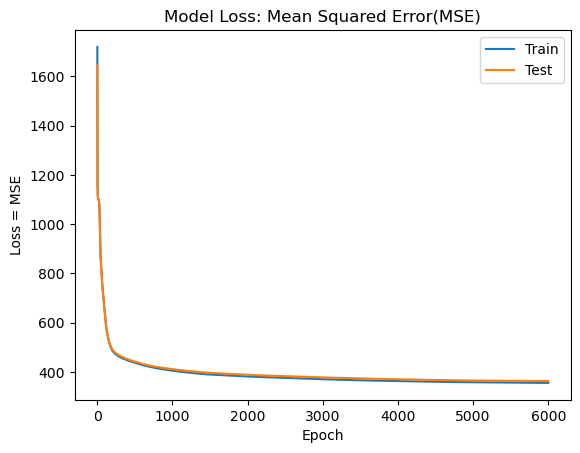

In [27]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss: Mean Squared Error(MSE)')
plt.ylabel('Loss = MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

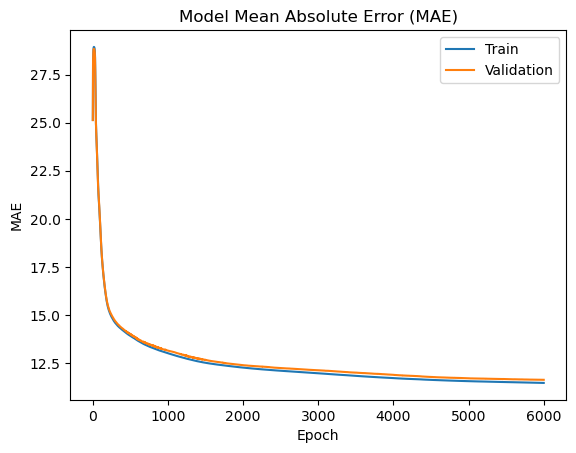

In [28]:
# Plot training and validation loss
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

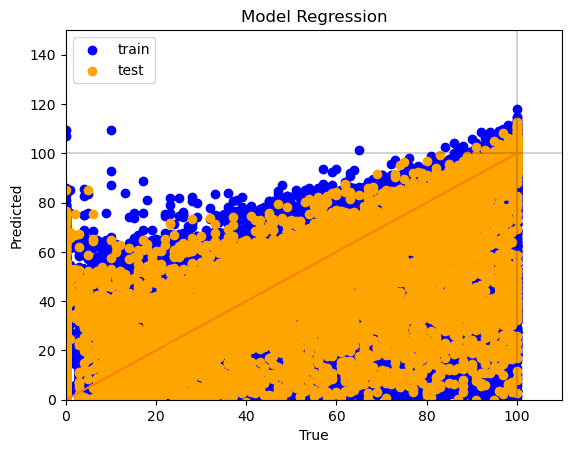

In [29]:
# Plot the regression results
plt.scatter(y_train, y_train_pred, label='train', color='blue')
plt.scatter(y_test, y_test_pred, label='test', color='orange')
plt.title('Model Regression')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.xlim(0,110)
plt.ylim(0,150)
plt.legend()
plt.axhline(y = 100, color = 'black', linestyle = '-', linewidth=0.25)
plt.axvline(x = 100, color = 'black', linestyle = '-', linewidth=0.25)
plt.plot([0,0],[100,100])
point1 = [0, 0]
point2 = [100, 100]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values)

plt.show()


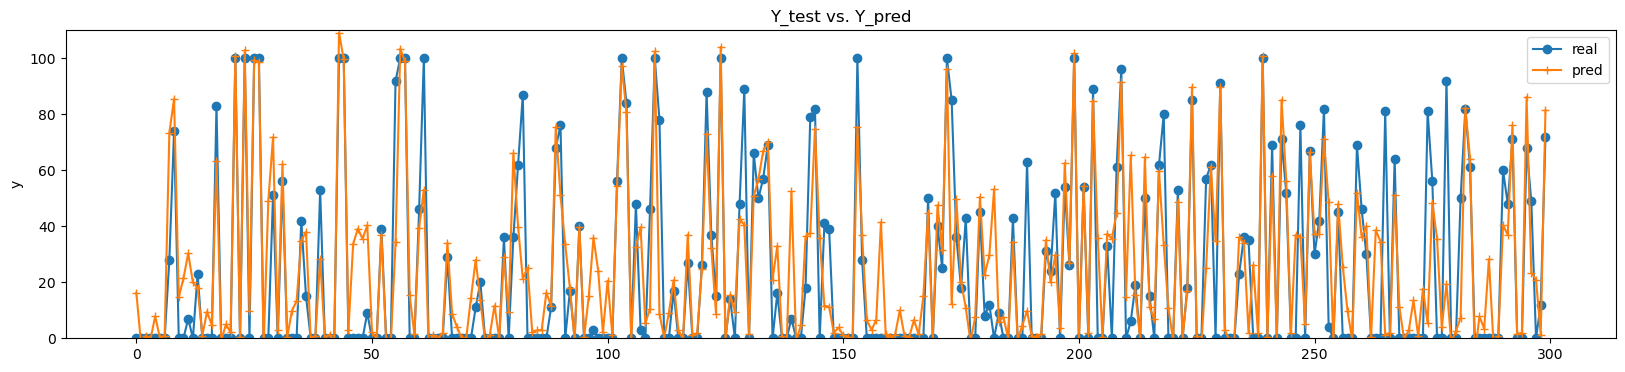

In [30]:
plt.figure(figsize=(20,4))
plt.plot(y_test[0:300], marker="o", label="real")
plt.plot(y_test_pred[0:300], marker="+", label="pred")
#plt.plot(estimator.history_['val_accuracy'])
plt.title('Y_test vs. Y_pred')
plt.ylabel('y')
plt.ylim(0,110)
#plt.xlabel('x_test')
plt.legend( loc='upper right')
plt.show()

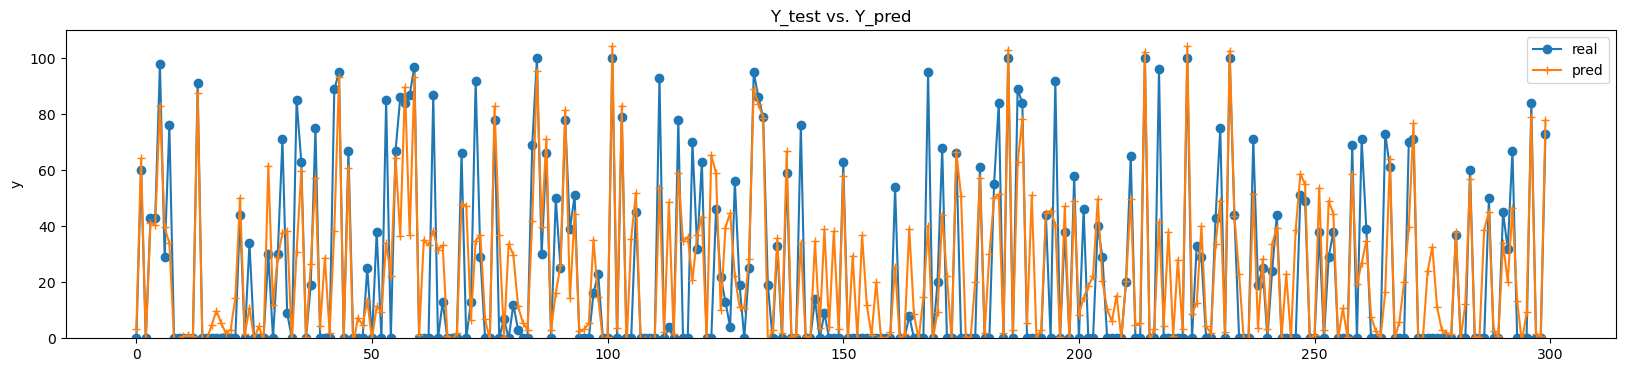

In [31]:
plt.figure(figsize=(20,4))
plt.plot(y_test[5200:5500], marker="o", label="real")
plt.plot(y_test_pred[5200:5500], marker="+", label="pred")
#plt.plot(estimator.history_['val_accuracy'])
plt.title('Y_test vs. Y_pred')
plt.ylabel('y')
plt.ylim(0,110)
#plt.xlabel('x_test')
plt.legend( loc='upper right')
plt.show()

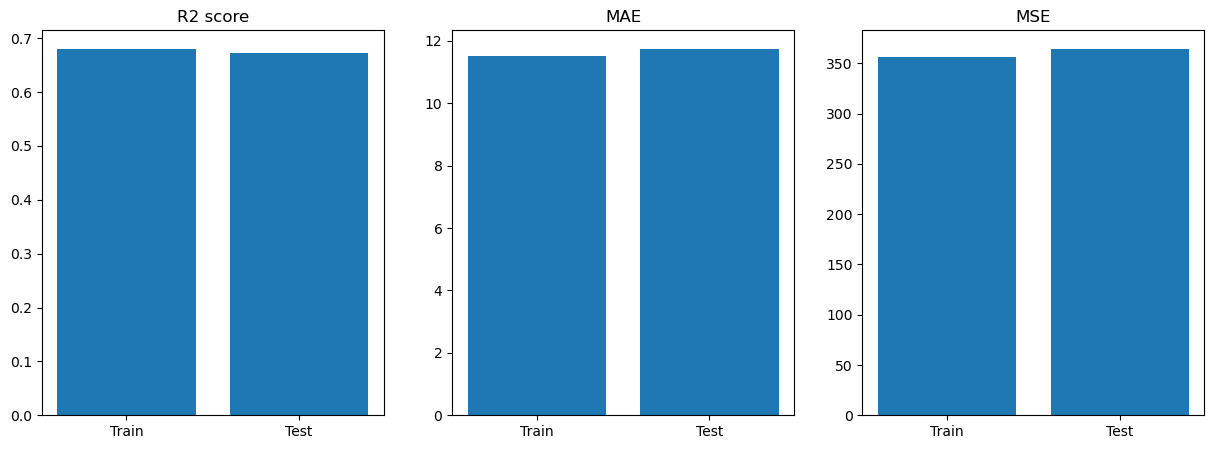

In [32]:
# Plot R2 score, MAE, and MSE for both training and testing data

train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(['Train', 'Test'], [train_r2, test_r2])
axs[0].set_title('R2 score')
axs[1].bar(['Train', 'Test'], [train_mae, test_mae])
axs[1].set_title('MAE')
axs[2].bar(['Train', 'Test'], [train_mse, test_mse])
axs[2].set_title('MSE')
plt.show()

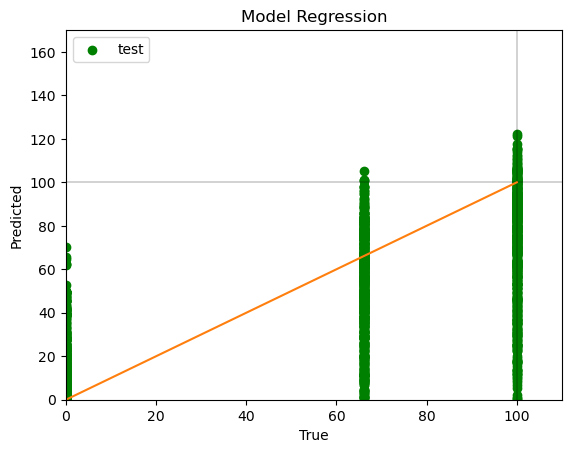

In [33]:
# Plot the regression results
#plt.scatter(y_train, y_train_pred, label='train', color='blue')
plt.scatter(y_test0, y_test_pred0, label='test', color='green')
plt.title('Model Regression')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.xlim(0,110)
plt.ylim(0,170)
plt.legend()
plt.axhline(y = 100, color = 'black', linestyle = '-', linewidth=0.25)
plt.axvline(x = 100, color = 'black', linestyle = '-', linewidth=0.25)
plt.plot([0,0],[100,100])
point1 = [0, 0]
point2 = [100, 100]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values)

plt.show()


In [34]:
X_test0.shape

(1836, 7, 1)

In [35]:
X_test0= np.squeeze(X_test0, axis=2)
X_test0.shape

(1836, 7)

In [36]:
y_test_pred0.shape

(1836, 1)

In [37]:
array0 = np.concatenate((X_test0, y_test_pred0), axis=1)
dataframe0=pd.DataFrame(array0)
dataframe0.head()

,0,1,2,3,4,5,6,7
0,0.492378,0.266667,0.318182,0.392857,0.428571,0.452381,0.469388,0.238465
1,0.177590,0.133333,0.181818,0.178571,0.171429,0.190476,0.183673,60.034142
2,0.396771,0.200000,0.272727,0.321429,0.342857,0.357143,0.367347,2.981962
3,0.373033,0.200000,0.227273,0.357143,0.371429,0.357143,0.367347,39.676853
4,0.499042,0.266667,0.409091,0.678571,0.657143,0.666667,0.653061,68.183327


In [38]:
condicion_0 = dataframe0[7] <=40
dataframe0_0 = dataframe0[condicion_0]
dataframe0_0.tail()

,0,1,2,3,4,5,6,7
1823,0.415780,0.200000,0.272727,0.321429,0.371429,0.380952,0.387755,6.737248
1824,0.203107,0.133333,0.181818,0.214286,0.200000,0.214286,0.224490,27.791151
1829,0.494664,0.266667,0.318182,0.392857,0.428571,0.452381,0.448980,9.394349
1831,0.619511,0.333333,0.454545,0.535714,0.571429,0.595238,0.612245,5.784596
1835,0.013690,0.000000,0.000000,0.000000,0.000000,0.023810,0.020408,19.519865


In [39]:
#condicion_100 = dataframe0[7] >=70
#dataframe0_100 = dataframe0[condicion_100]
dataframe0_100 = dataframe0.loc[(dataframe0[7] > 90) & (dataframe0[7] < 120)]
dataframe0_100.tail()

,0,1,2,3,4,5,6,7
1801,0.808125,0.400000,0.545455,0.785714,0.828571,0.833333,0.836735,94.522820
1802,0.316908,0.133333,0.227273,0.250000,0.371429,0.380952,0.367347,96.626122
1805,0.439881,0.266667,0.363636,0.428571,0.514286,0.523810,0.530612,95.476532
1810,0.332261,0.133333,0.409091,0.392857,0.400000,0.380952,0.387755,101.792976
1825,0.584445,0.266667,0.363636,0.428571,0.628571,0.619048,0.612245,92.101517


In [40]:
dataframe0_66 = dataframe0.loc[(dataframe0[7] > 40) & (dataframe0[7] < 90)]
#resultado = df.loc[(df['columna'] > 5) & (df['columna'] < 10)]
#dataframe0_66 = dataframe0[condicion_66]
dataframe0_66.tail()

,0,1,2,3,4,5,6,7
1828,0.096096,0.066667,0.090909,0.071429,0.085714,0.095238,0.122449,78.499031
1830,0.355161,0.200000,0.363636,0.392857,0.400000,0.404762,0.408163,81.611427
1832,0.717535,0.600000,0.681818,0.714286,0.742857,0.761905,0.755102,71.707924
1833,0.223095,0.066667,0.227273,0.214286,0.228571,0.214286,0.224490,78.711746
1834,0.340584,0.133333,0.227273,0.392857,0.400000,0.380952,0.387755,80.006371


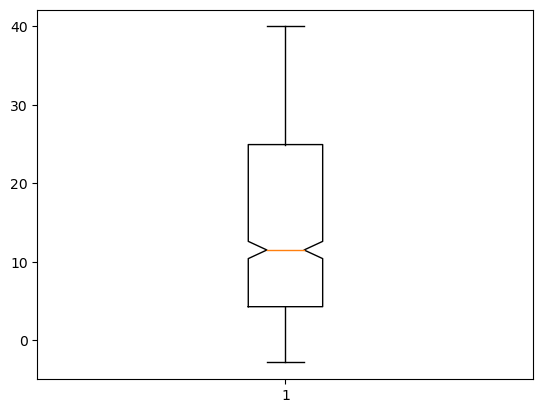

In [41]:
plt.boxplot(dataframe0_0[7], showfliers=False, notch=True)


# Mostrar el valor de la mediana y los cuartiles
#mediana = plt.median(dataframe0[7])
#cuartiles = plt.boxplot(dataframe0[7])['whiskers']

#plt.text(1, mediana, f"Mediana: {mediana}", ha='center', va='bottom')
#plt.text(1.25, cuartiles[0].get_ydata()[1], f"Cuartil inferior: {cuartiles[0].get_ydata()[1]}", ha='center', va='bottom')
#plt.text(1.25, cuartiles[1].get_ydata()[1], f"Cuartil superior: {cuartiles[1].get_ydata()[1]}", ha='center', va='bottom')

# Mostrar el diagrama
plt.show()

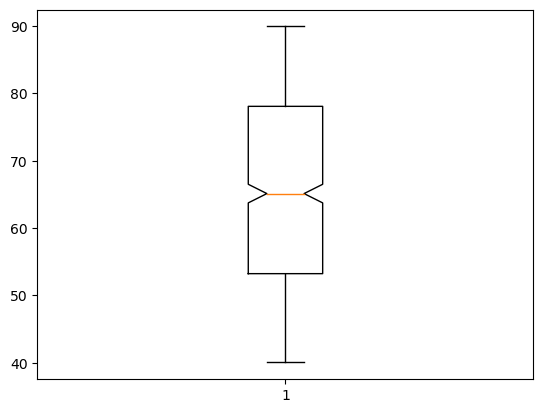

In [42]:
plt.boxplot(dataframe0_66[7], showfliers=False, notch=True)

# Mostrar el valor de la mediana y los cuartiles
#mediana = plt.median(dataframe0[7])
#cuartiles = plt.boxplot(dataframe0[7])['whiskers']

#plt.text(1, mediana, f"Mediana: {mediana}", ha='center', va='bottom')
#plt.text(1.25, cuartiles[0].get_ydata()[1], f"Cuartil inferior: {cuartiles[0].get_ydata()[1]}", ha='center', va='bottom')
#plt.text(1.25, cuartiles[1].get_ydata()[1], f"Cuartil superior: {cuartiles[1].get_ydata()[1]}", ha='center', va='bottom')

# Mostrar el diagrama
plt.show()

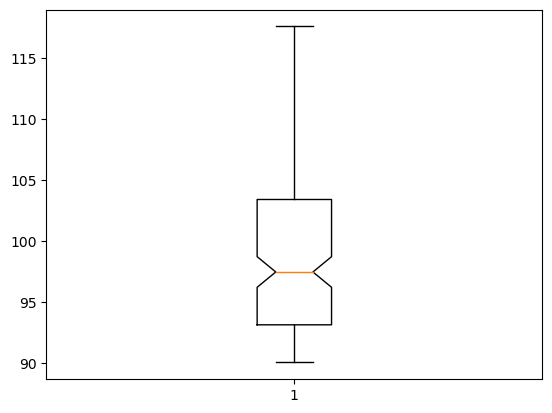

In [43]:
plt.boxplot(dataframe0_100[7], showfliers=False, notch=True)

# Mostrar el valor de la mediana y los cuartiles
#mediana = plt.median(dataframe0[7])
#cuartiles = plt.boxplot(dataframe0[7])['whiskers']

#plt.text(1, mediana, f"Mediana: {mediana}", ha='center', va='bottom')
#plt.text(1.25, cuartiles[0].get_ydata()[1], f"Cuartil inferior: {cuartiles[0].get_ydata()[1]}", ha='center', va='bottom')
#plt.text(1.25, cuartiles[1].get_ydata()[1], f"Cuartil superior: {cuartiles[1].get_ydata()[1]}", ha='center', va='bottom')

# Mostrar el diagrama
plt.show()

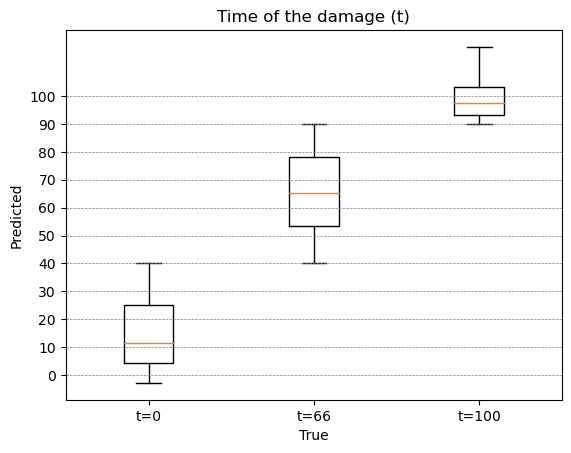

In [44]:
datos0 = dataframe0_0[7]
datos66= dataframe0_66[7]
datos100= dataframe0_100[7]

# Crear una lista con los datos a representar
datos = [datos0, datos66, datos100]

# Crear una lista con los nombres de los grupos
nombres = ['t=0', 't=66', 't=100']

# Crear el gráfico de boxplots
fig, ax = plt.subplots()
ax.boxplot(datos, labels=nombres)

# Agregar líneas de separación horizontal cada 10 unidades
for i in range(0, 110, 10):
    ax.axhline(y=i, color='gray', linestyle='--', linewidth=0.5)

# Agregar título y etiquetas de los ejes
plt.title('Time of the damage (t)')
plt.xlabel('True')
plt.ylabel('Predicted')

# Configurar la numeración en el eje y
plt.yticks(np.arange(0, 101, 10))

# Mostrar el gráfico
plt.show()



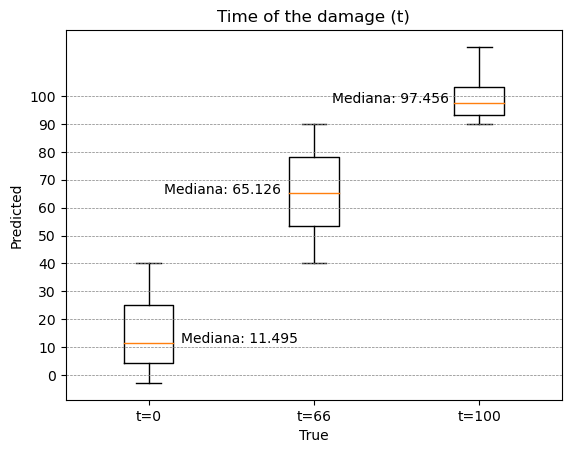

In [45]:
datos0 = dataframe0_0[7]
datos66= dataframe0_66[7]
datos100= dataframe0_100[7]

mediana0 = median(dataframe0_0[7])
mediana0 =round(mediana0,3)

mediana66 = median(dataframe0_66[7])
mediana66 =round(mediana66,3)

mediana100 = median(dataframe0_100[7])
mediana100 =round(mediana100,3)


#plt.text(1, mediana66, f"Mediana: {mediana}", ha='left', va='center')
#plt.text(1, mediana100, f"Mediana: {mediana}", ha='left', va='center')

# Crear una lista con los datos a representar
datos = [datos0, datos66, datos100]

# Crear una lista con los nombres de los grupos
nombres = ['t=0', 't=66', 't=100']

# Crear el gráfico de boxplots
fig, ax = plt.subplots()
ax.boxplot(datos, labels=nombres)

# Agregar líneas de separación horizontal cada 10 unidades
for i in range(0, 110, 10):
    ax.axhline(y=i, color='gray', linestyle='--', linewidth=0.5)

# Agregar título y etiquetas de los ejes
plt.title('Time of the damage (t)')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.text(1.55, mediana0, f"Mediana: {mediana0}", ha='center', va='baseline')
plt.text(1.8, mediana66, f"Mediana: {mediana66}", ha='right', va='baseline')
plt.text(2.82, mediana100, f"Mediana: {mediana100}", ha='right', va='baseline')

# Configurar la numeración en el eje y
plt.yticks(np.arange(0, 101, 10))

# Mostrar el gráfico
plt.show()

In [12]:
np.savetxt("dataframe0epochs8000.csv", dataframe0, delimiter=",")

NameError: name 'dataframe0' is not defined

In [13]:
dataframe = pd.read_csv("dataframe0epochs8000.csv", sep=',', header=None) 
dataframe.head()

,0,1,2,3,4,5,6,7
0,0.492378,0.266667,0.318182,0.392857,0.428571,0.452381,0.469388,0.238465
1,0.177590,0.133333,0.181818,0.178571,0.171429,0.190476,0.183673,60.034142
2,0.396771,0.200000,0.272727,0.321429,0.342857,0.357143,0.367347,2.981962
3,0.373033,0.200000,0.227273,0.357143,0.371429,0.357143,0.367347,39.676853
4,0.499042,0.266667,0.409091,0.678571,0.657143,0.666667,0.653061,68.183327


In [16]:
condicion_0 = dataframe[7] <=43
dataframe0_0 = dataframe[condicion_0]
dataframe0_0.tail()

,0,1,2,3,4,5,6,7
1823,0.415780,0.200000,0.272727,0.321429,0.371429,0.380952,0.387755,6.737248
1824,0.203107,0.133333,0.181818,0.214286,0.200000,0.214286,0.224490,27.791151
1829,0.494664,0.266667,0.318182,0.392857,0.428571,0.452381,0.448980,9.394349
1831,0.619511,0.333333,0.454545,0.535714,0.571429,0.595238,0.612245,5.784596
1835,0.013690,0.000000,0.000000,0.000000,0.000000,0.023810,0.020408,19.519865


In [35]:
dataframe0_66 = dataframe.loc[(dataframe[7] > 45) & (dataframe[7] < 85)]
dataframe0_66.tail()

,0,1,2,3,4,5,6,7
1828,0.096096,0.066667,0.090909,0.071429,0.085714,0.095238,0.122449,78.499031
1830,0.355161,0.200000,0.363636,0.392857,0.400000,0.404762,0.408163,81.611427
1832,0.717535,0.600000,0.681818,0.714286,0.742857,0.761905,0.755102,71.707924
1833,0.223095,0.066667,0.227273,0.214286,0.228571,0.214286,0.224490,78.711746
1834,0.340584,0.133333,0.227273,0.392857,0.400000,0.380952,0.387755,80.006371


In [46]:
dataframe0_100 = dataframe.loc[(dataframe[7] > 89) & (dataframe[7] < 105)]
dataframe0_100.tail()

,0,1,2,3,4,5,6,7
1801,0.808125,0.400000,0.545455,0.785714,0.828571,0.833333,0.836735,94.522820
1802,0.316908,0.133333,0.227273,0.250000,0.371429,0.380952,0.367347,96.626122
1805,0.439881,0.266667,0.363636,0.428571,0.514286,0.523810,0.530612,95.476532
1810,0.332261,0.133333,0.409091,0.392857,0.400000,0.380952,0.387755,101.792976
1825,0.584445,0.266667,0.363636,0.428571,0.628571,0.619048,0.612245,92.101517


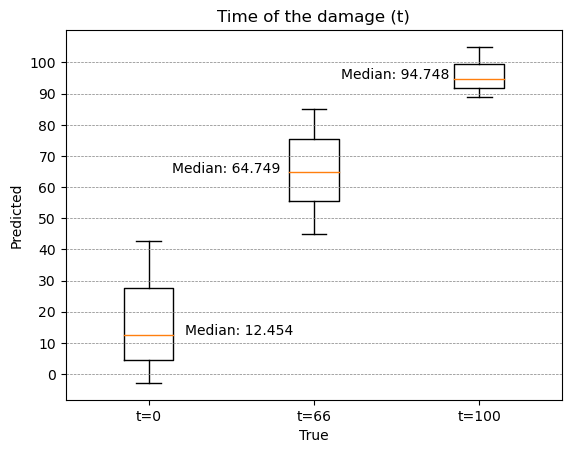

In [48]:
datos0 = dataframe0_0[7]
datos66= dataframe0_66[7]
datos100= dataframe0_100[7]

mediana0 = median(dataframe0_0[7])
mediana0 =round(mediana0,3)

mediana66 = median(dataframe0_66[7])
mediana66 =round(mediana66,3)

mediana100 = median(dataframe0_100[7])
mediana100 =round(mediana100,3)


#plt.text(1, mediana66, f"Mediana: {mediana}", ha='left', va='center')
#plt.text(1, mediana100, f"Mediana: {mediana}", ha='left', va='center')

# Crear una lista con los datos a representar
datos = [datos0, datos66, datos100]

# Crear una lista con los nombres de los grupos
nombres = ['t=0', 't=66', 't=100']

# Crear el gráfico de boxplots
fig, ax = plt.subplots()
ax.boxplot(datos, labels=nombres)

# Agregar líneas de separación horizontal cada 10 unidades
for i in range(0, 110, 10):
    ax.axhline(y=i, color='gray', linestyle='--', linewidth=0.5)

# Agregar título y etiquetas de los ejes
plt.title('Time of the damage (t)')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.text(1.55, mediana0, f"Median: {mediana0}", ha='center', va='baseline')
plt.text(1.8, mediana66, f"Median: {mediana66}", ha='right', va='baseline')
plt.text(2.82, mediana100, f"Median: {mediana100}", ha='right', va='baseline')

# Configurar la numeración en el eje y
plt.yticks(np.arange(0, 101, 10))

# Mostrar el gráfico
plt.show()

In [32]:
q1_0= np.percentile(datos0, 25)
q3_0= np.percentile(datos0, 75)
iqr_0 = q3_0 - q1_0
min_val_0 = np.min(datos0)
max_val_0 = np.max(datos0)
lower_threshold_0 = q1_0 - 1.5 * iqr_0
upper_threshold_0 = q3_0 + 1.5 * iqr_0
outliers_0 = len(datos0[(datos0 < lower_threshold_0) | (datos0 > upper_threshold_0)])
median_0 = np.median(datos0)
num_values_0 = len(datos0)

# Imprimir resultados
print("Datos_0")
print("Num. valores:", num_values_0)
print("Q1:", q1_0)
print("Q3:", q3_0)
print("IQR:", iqr_0)
print("Mínimo absoluto:", min_val_0)
print("Máximo absoluto:", max_val_0)
print("Outliers:", outliers_0)
print("Median:", median_0)

Datos_0
Num. valores: 919
Q1: 4.457906246185303
Q3: 27.684757232666016
IQR: 23.226850986480713
Mínimo absoluto: -2.837913274765014
Máximo absoluto: 42.84362030029297
Outliers: 0
Median: 12.453513145446776


In [33]:
q1_66= np.percentile(datos66, 25)
q3_66= np.percentile(datos66, 75)
iqr_66 = q3_66 - q1_66
min_val_66 = np.min(datos66)
max_val_66 = np.max(datos66)
lower_threshold_66 = q1_66 - 1.5 * iqr_66
upper_threshold_66 = q3_66 + 1.5 * iqr_66
outliers_66 = len(datos66[(datos66 < lower_threshold_66) | (datos66 > upper_threshold_66)])
median_66 = np.median(datos66)
num_values_66 = len(datos66)

# Imprimir resultados
print("Datos_66")
print("Num. valores:", num_values_66)
print("Q1:", q1_66)
print("Q3:", q3_66)
print("IQR:", iqr_66)
print("Mínimo absoluto:", min_val_66)
print("Máximo absoluto:", max_val_66)
print("Outliers:", outliers_66)
print("Median:", median_66)


Datos_66
Num. valores: 726
Q1: 56.84111404418945
Q3: 78.80967330932617
IQR: 21.96855926513672
Mínimo absoluto: 45.05145263671875
Máximo absoluto: 89.94200134277342
Outliers: 0
Median: 67.73688888549805


In [34]:
q1_100= np.percentile(datos100, 25)
q3_100= np.percentile(datos100, 75)
iqr_100 = q3_100 - q1_100
min_val_100 = np.min(datos100)
max_val_100 = np.max(datos100)
lower_threshold_100 = q1_100 - 1.5 * iqr_100
upper_threshold_100 = q3_100 + 1.5 * iqr_100
outliers_100 = len(datos100[(datos100 < lower_threshold_100) | (datos100 > upper_threshold_100)])
median_100 = np.median(datos100)
num_values_100 = len(datos100)

# Imprimir resultados
print("Datos_0")
print("Num. valores:", num_values_100)
print("Q1:", q1_100)
print("Q3:", q3_100)
print("IQR:", iqr_100)
print("Mínimo absoluto:", min_val_100)
print("Máximo absoluto:", max_val_100)
print("Outliers:", outliers_100)
print("Median:", median_100)

Datos_0
Num. valores: 154
Q1: 92.89431953430176
Q3: 101.48158645629881
IQR: 8.587266921997056
Mínimo absoluto: 90.03376007080078
Máximo absoluto: 109.22577667236328
Outliers: 0
Median: 96.768009185791
